# Автокорреляция и частичная автокорреляция рядов, приведенных к стационарным

Приведем ряды с продолжительностью жизни в странах к стационарным \
и построим для них графики автокорреляции и частичной автокорреляции.\
Поскольку ряды короткие (а дифференцирование делает ряд еще короче) и ряды не имеют сезонности,\
результат будет основан на малом количестве данных, и закономерность мы скорее всего не поймаем.\
Тем не менее, посмотрим на результат.

In [34]:
import sys
# Добавим папку с корнем проекта в список системных директорий, чтобы Python видел путь к папке utils
sys.path.append('..')

In [35]:
import math
import pandas as pd
import matplotlib.pyplot as plt 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from utils.constants import (
    F, 
)
from utils.prepare_data import (
    get_location_time_series,
    get_location_by_code,
    get_train_test_data,
    get_integration_order,
)

%matplotlib inline

from warnings import simplefilter
simplefilter('ignore')

In [36]:
# Загрузим таблицу
data = pd.read_csv(
    '../data/cumulative_life_expectancy_prepared.csv'
)

In [37]:
# Загрузим данные с порядком интегрирования рядов, который посчитали ранее
integration_order_data = pd.read_csv(
    '../data/integration_order.csv'
)
integration_order_data.head()

,SpatialDimValueCode,IntegrationOrder
0,AGO,1
1,BDI,1
2,BEN,1
3,BFA,1
4,BWA,1


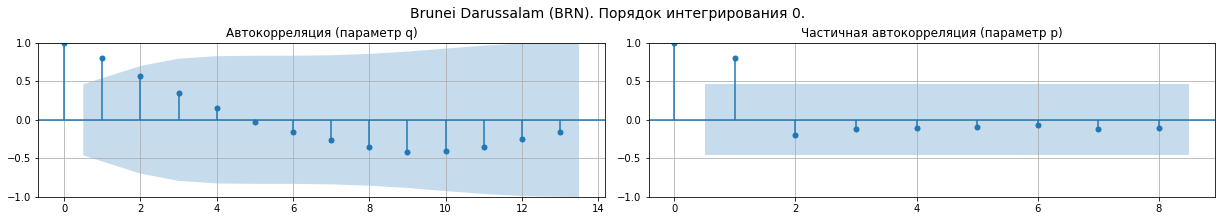

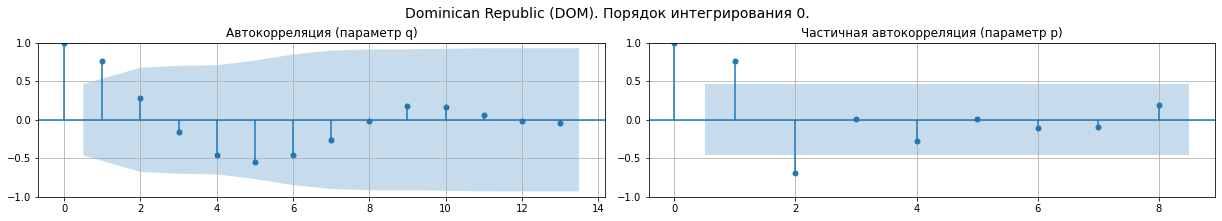

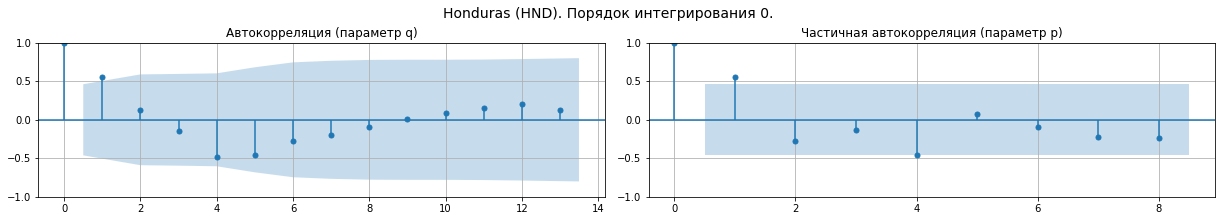

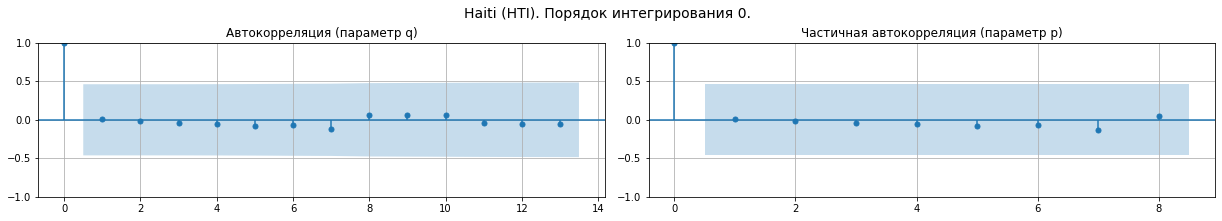

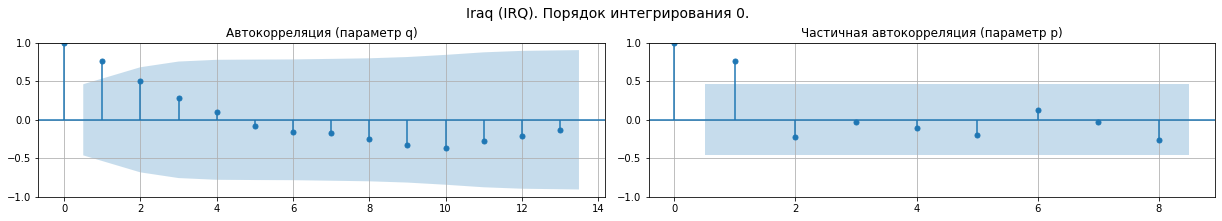

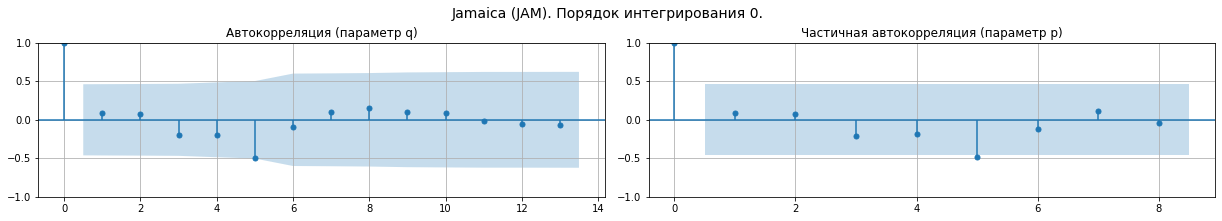

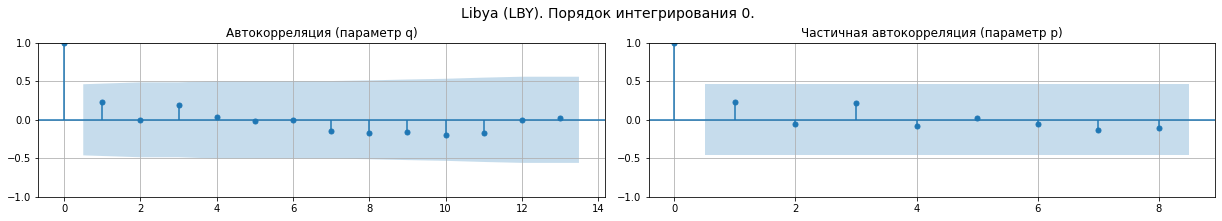

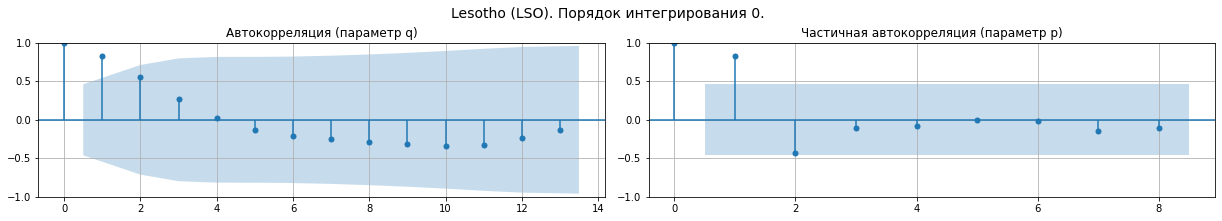

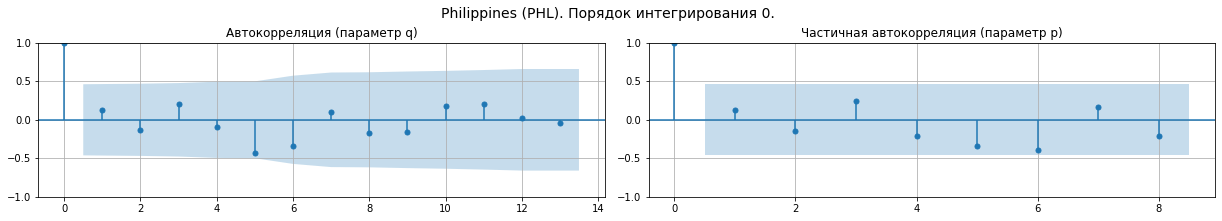

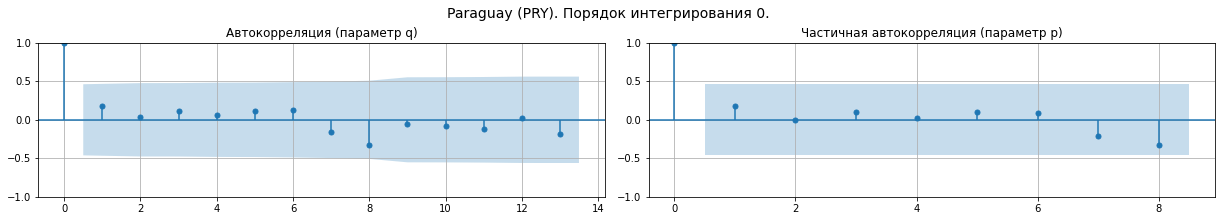

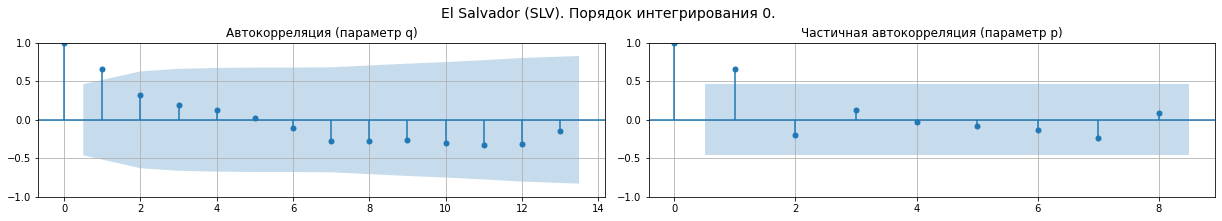

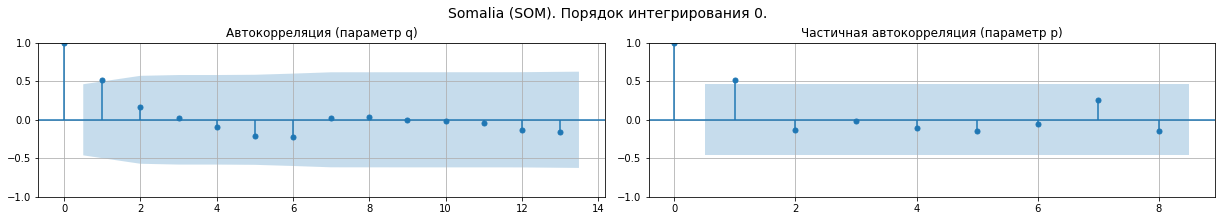

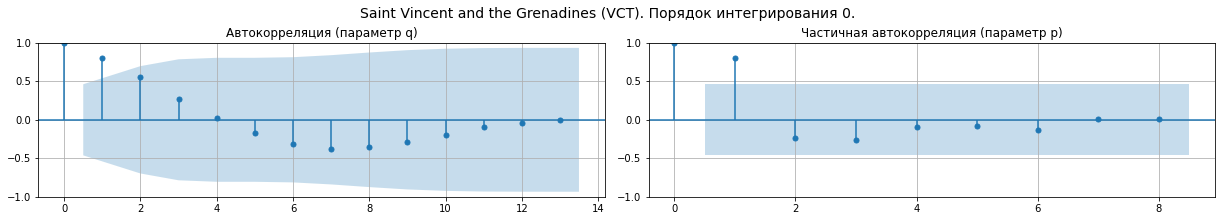

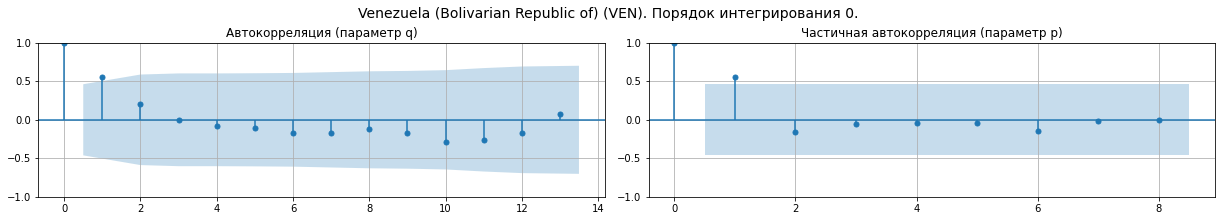

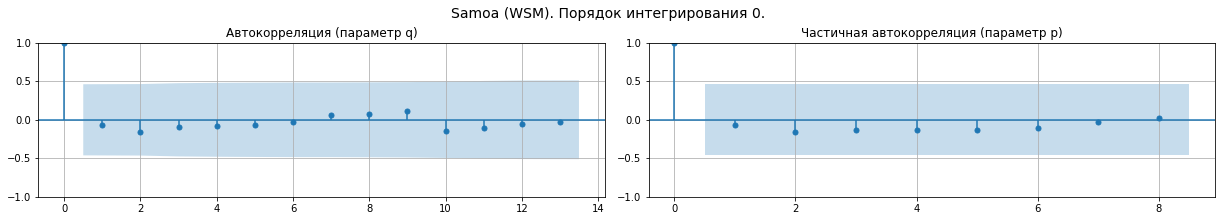

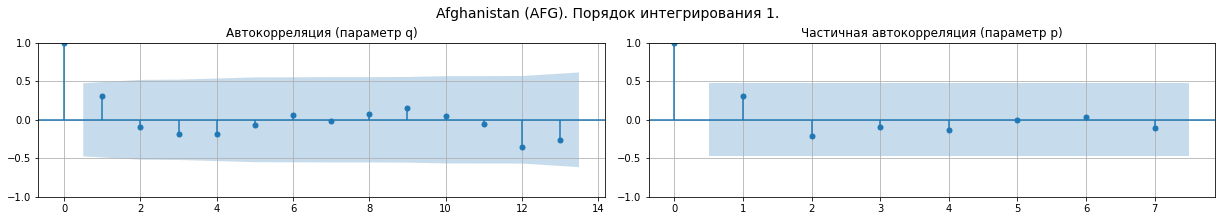

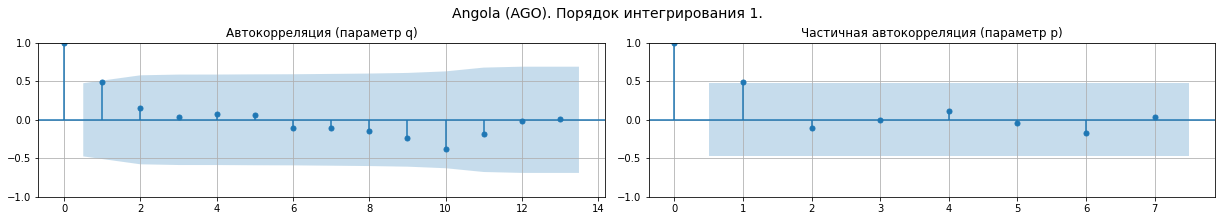

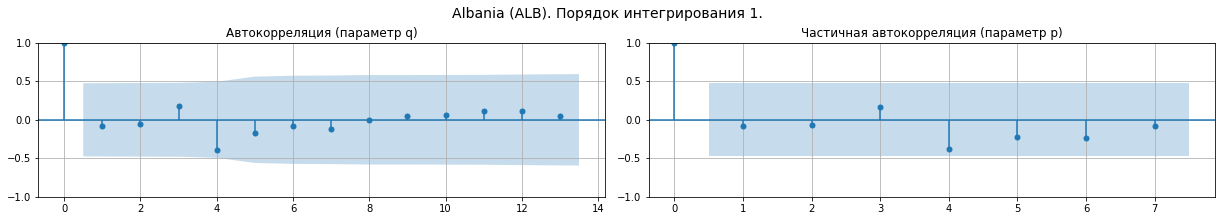

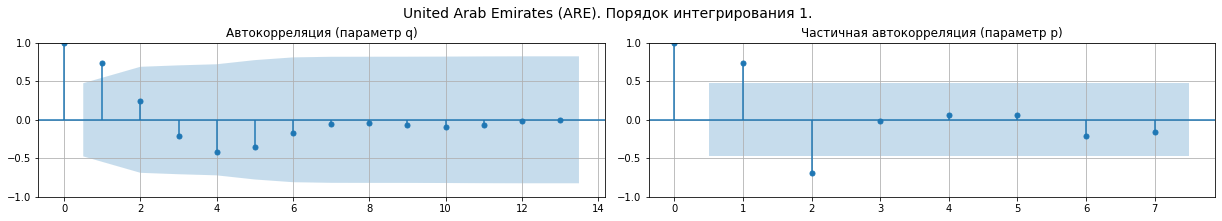

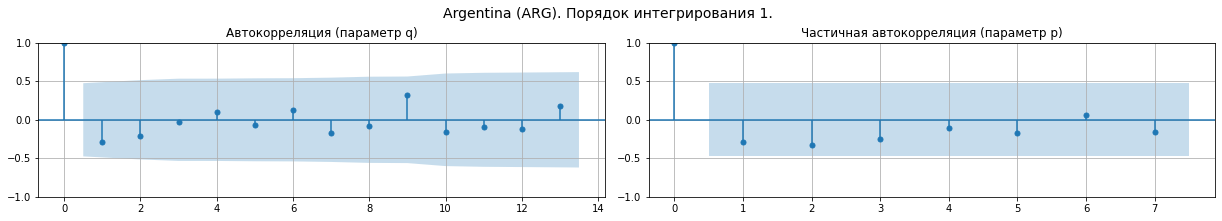

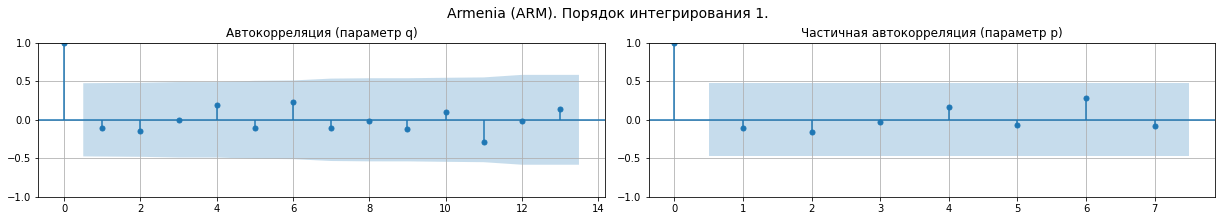

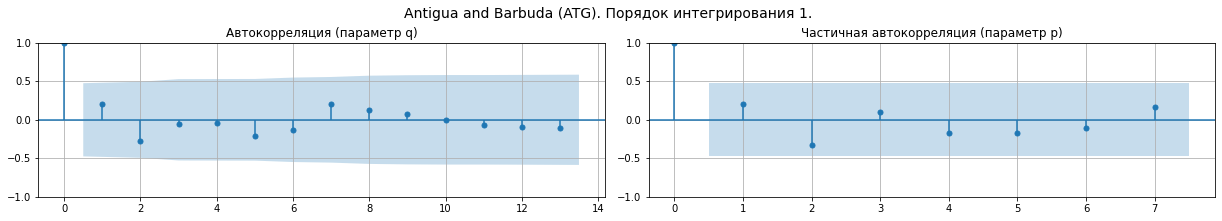

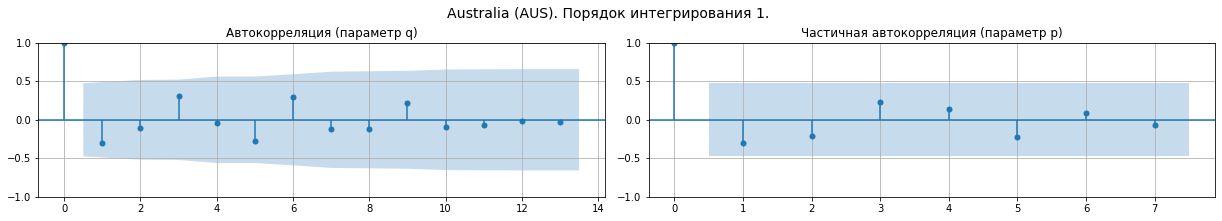

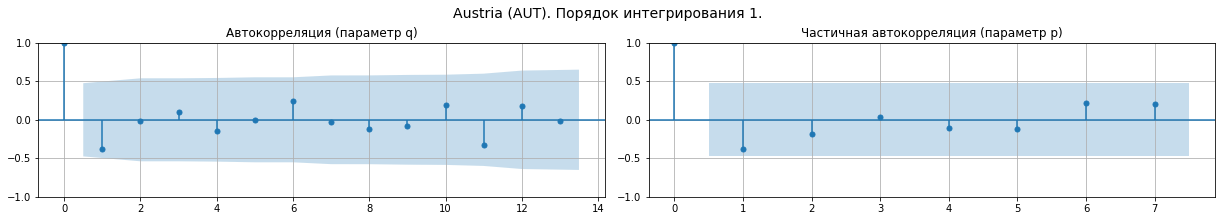

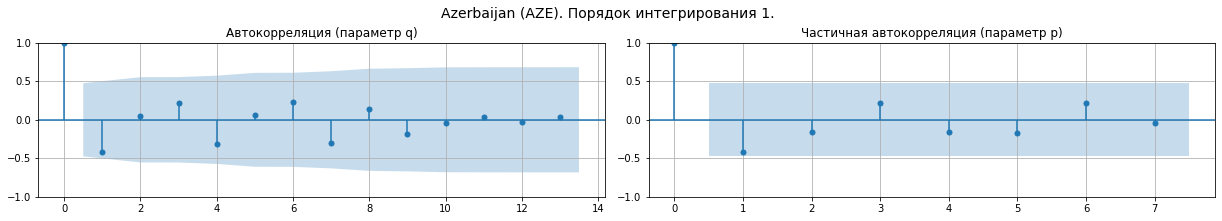

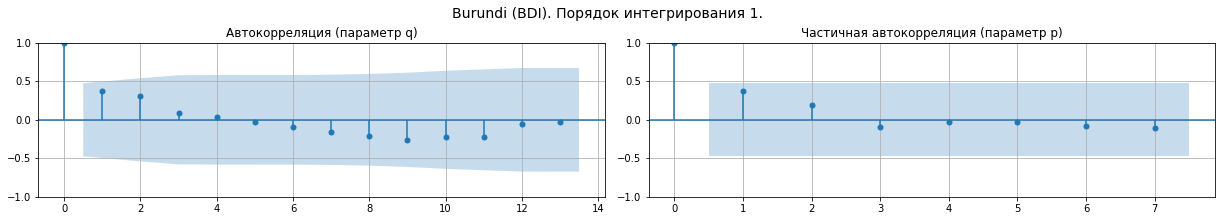

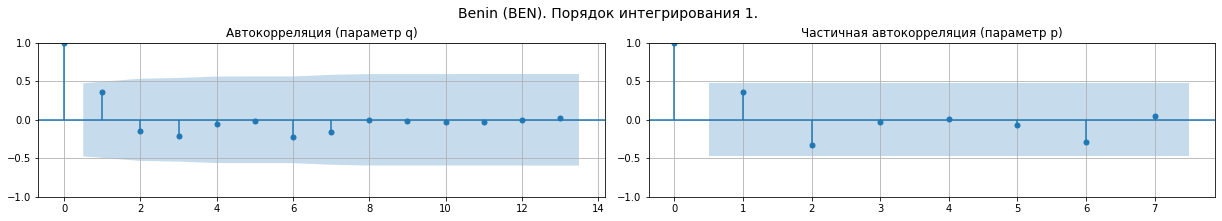

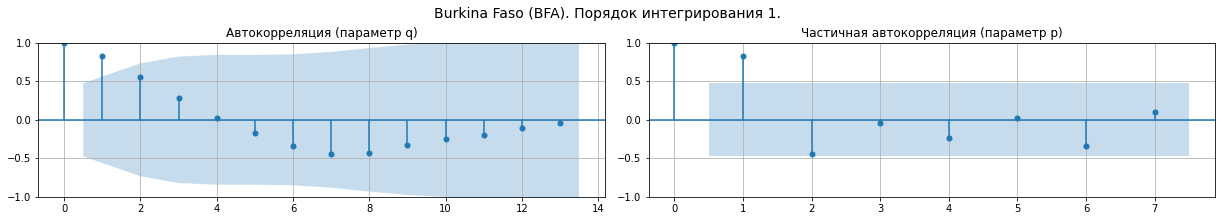

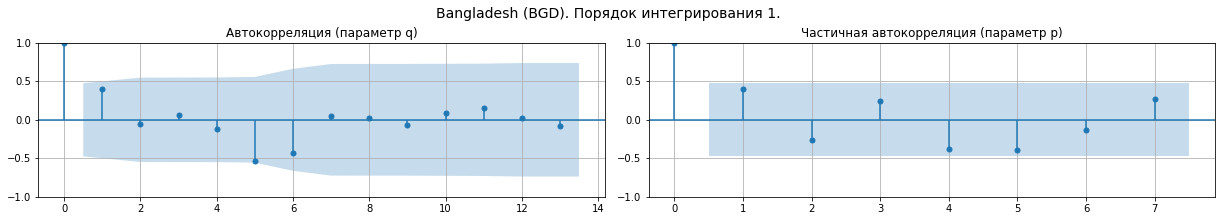

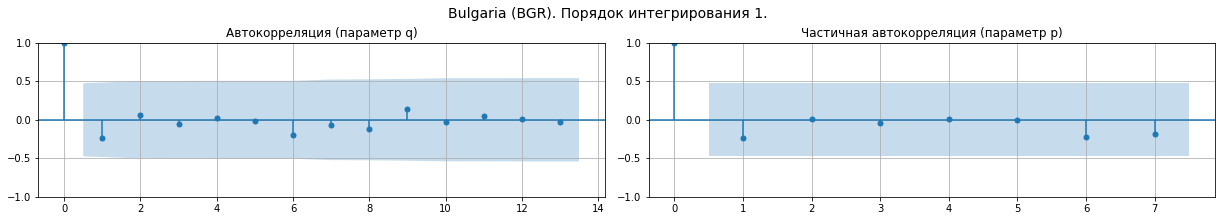

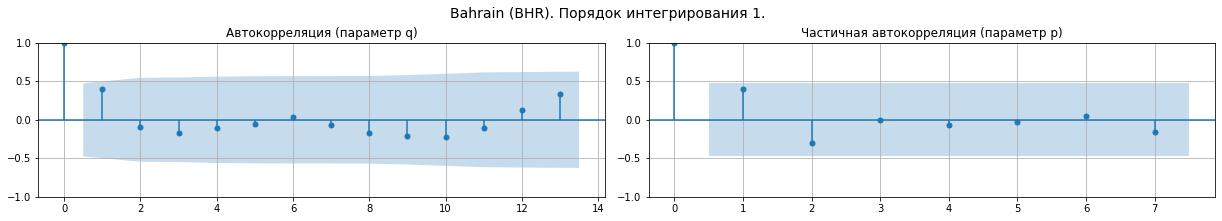

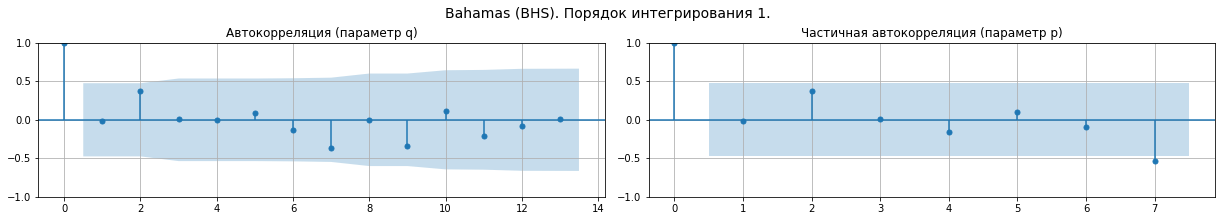

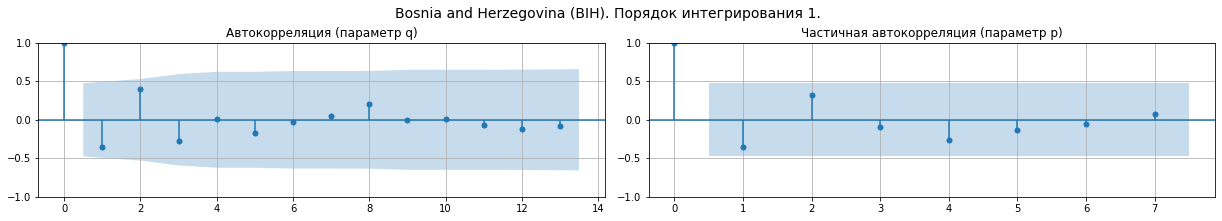

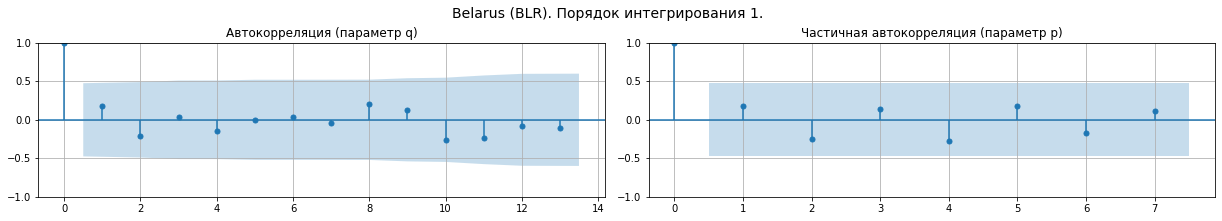

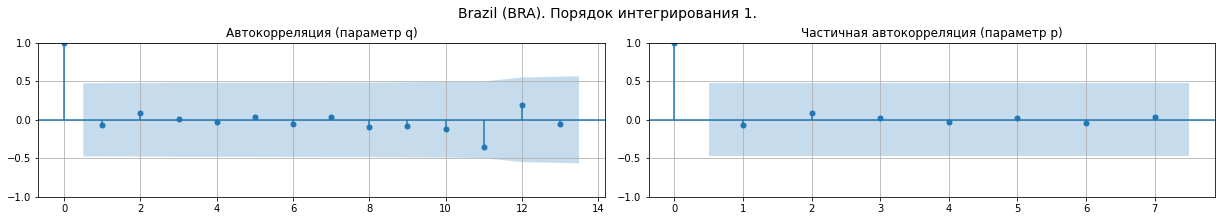

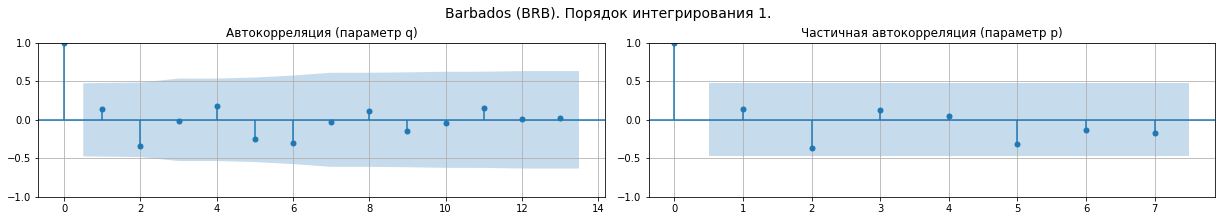

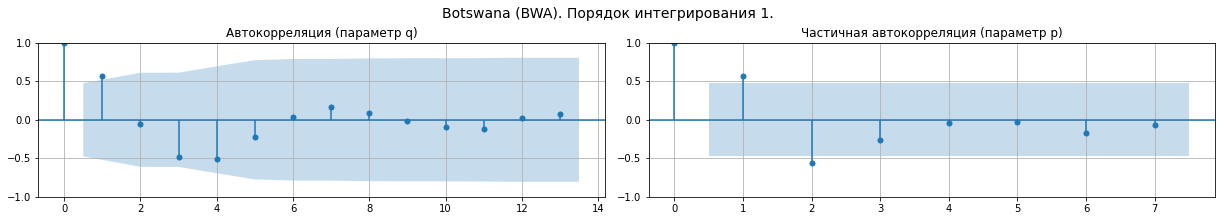

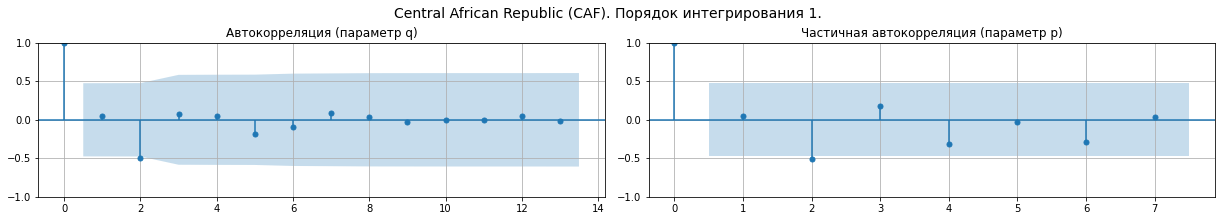

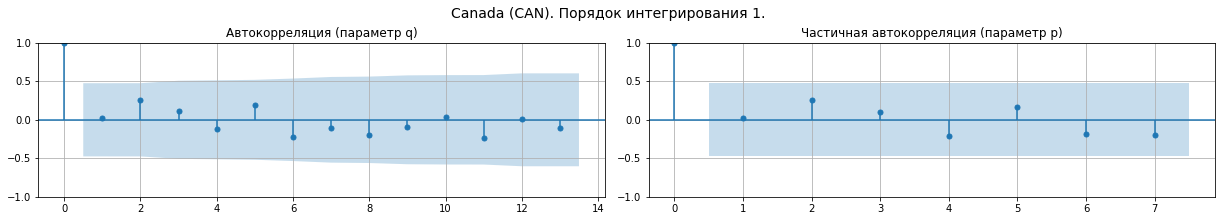

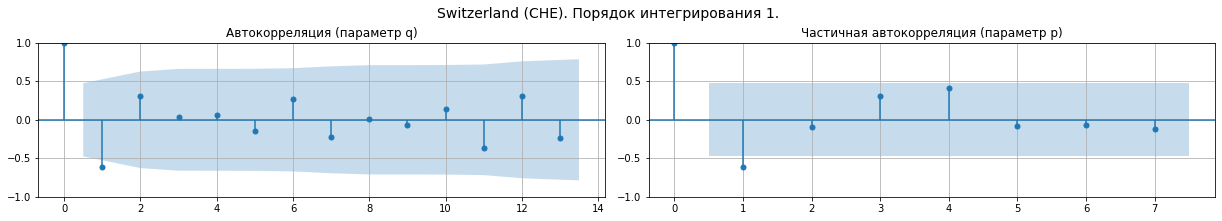

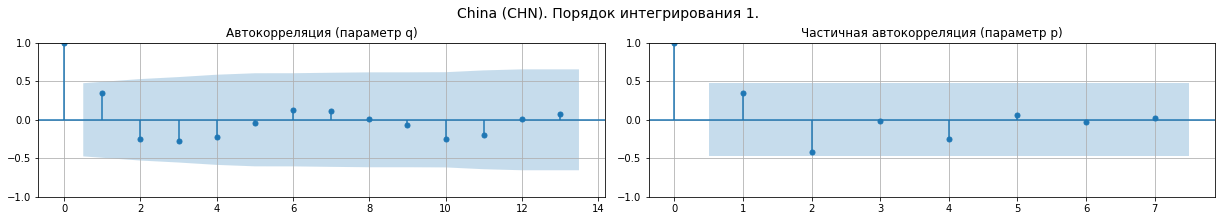

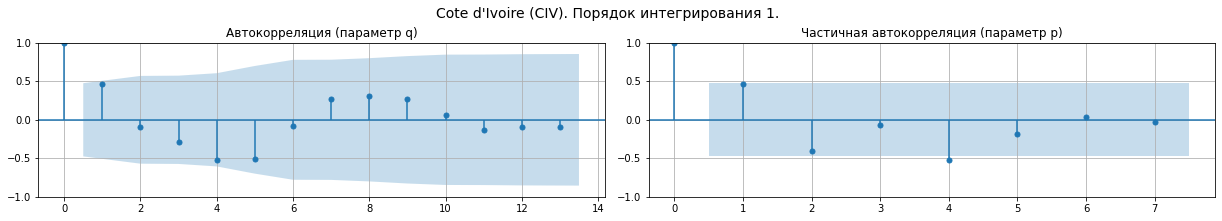

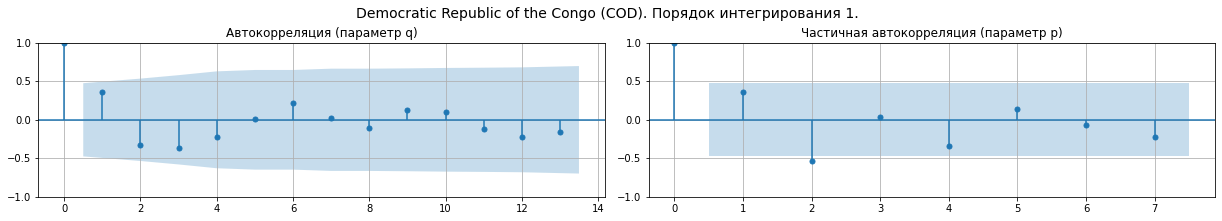

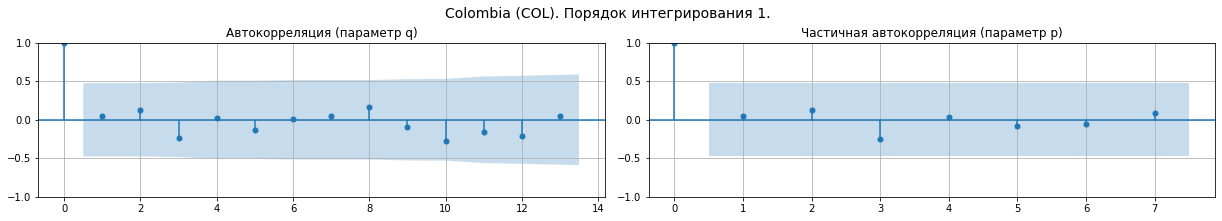

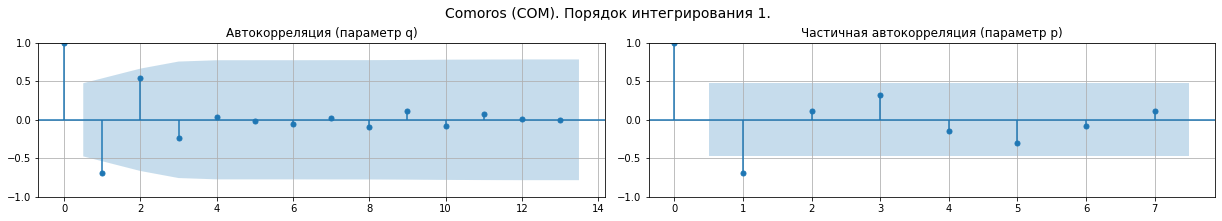

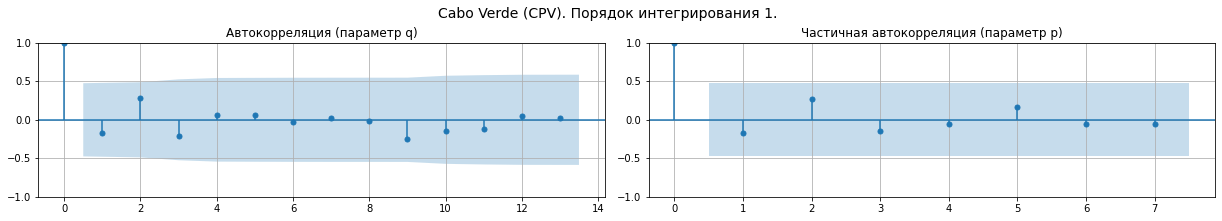

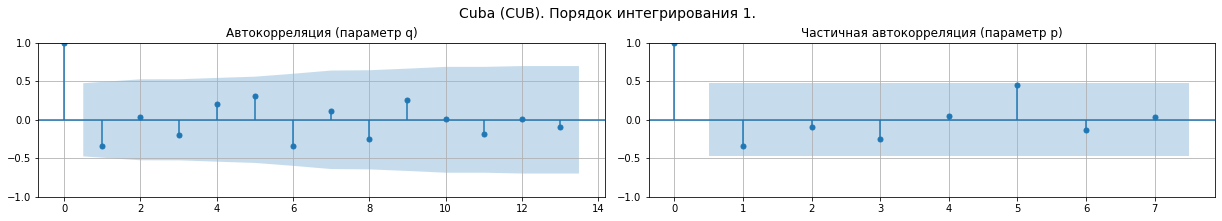

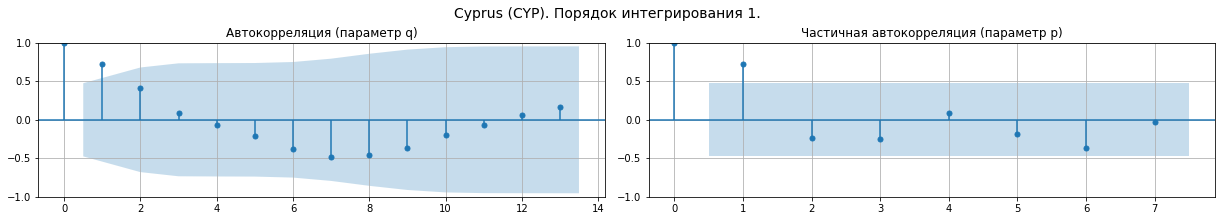

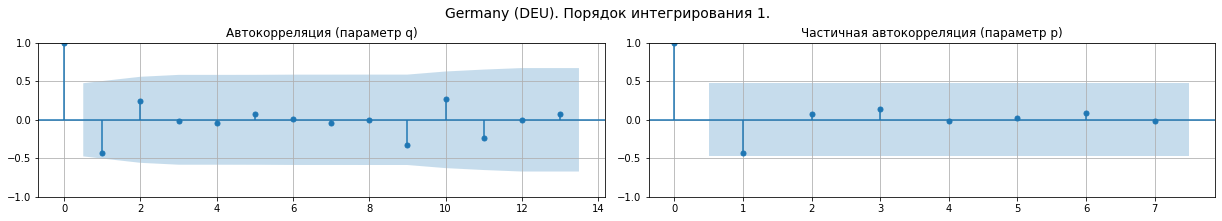

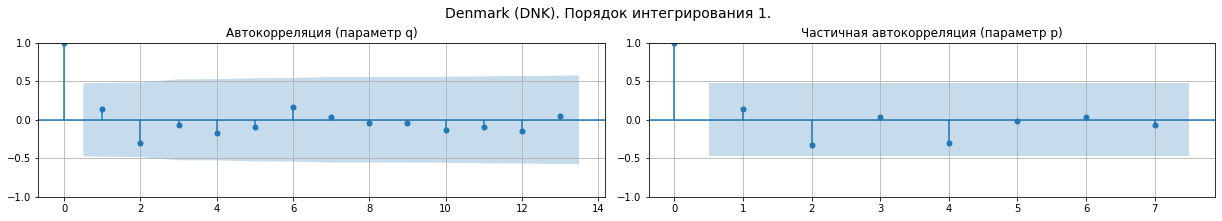

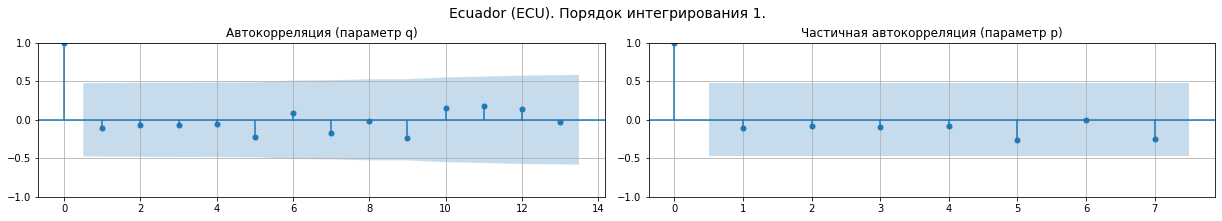

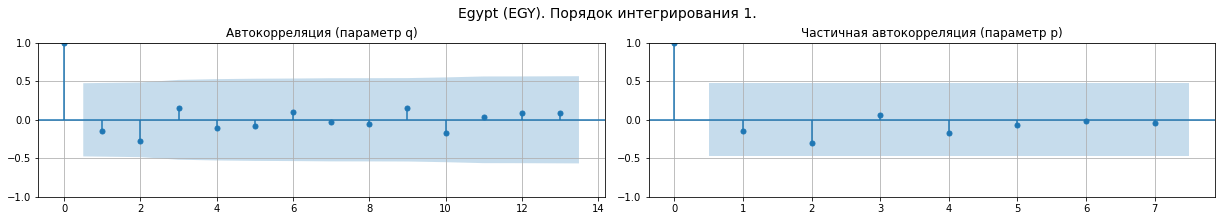

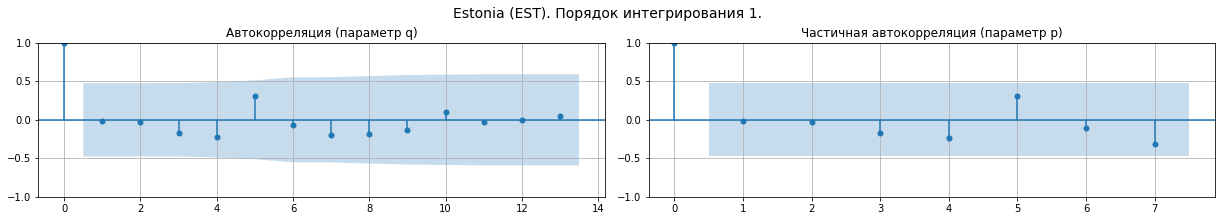

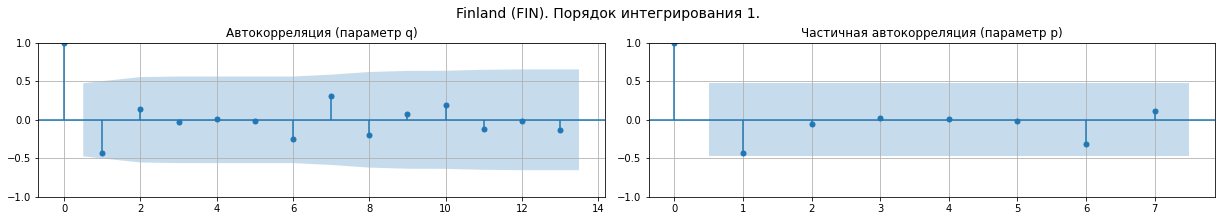

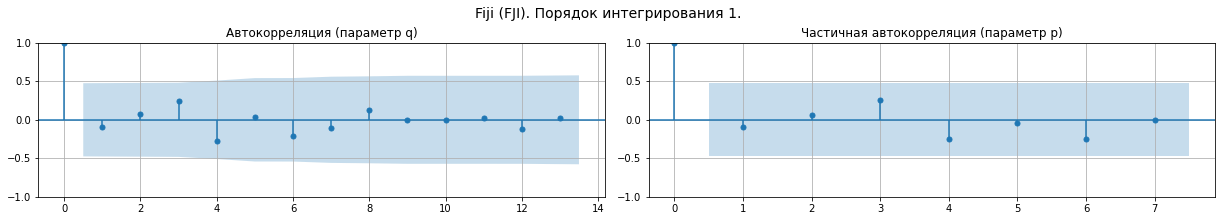

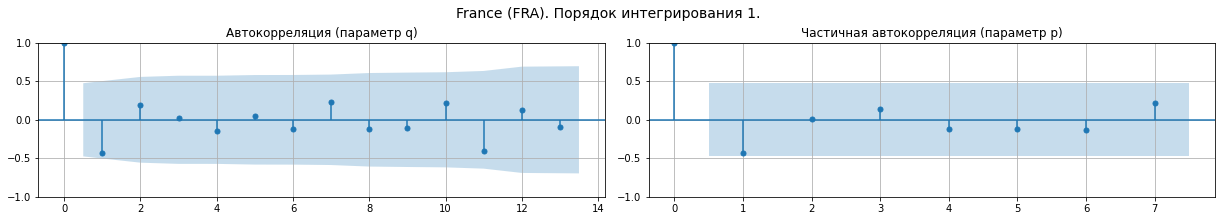

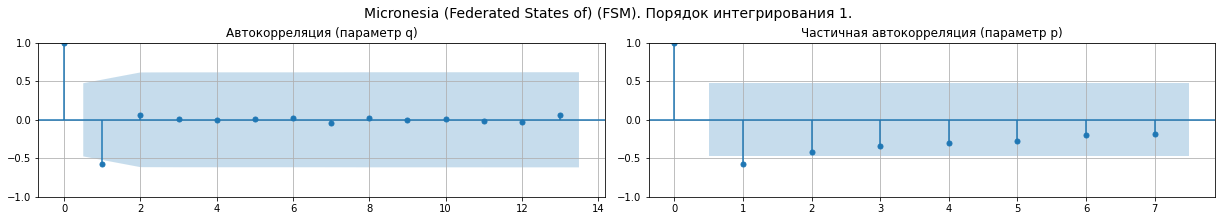

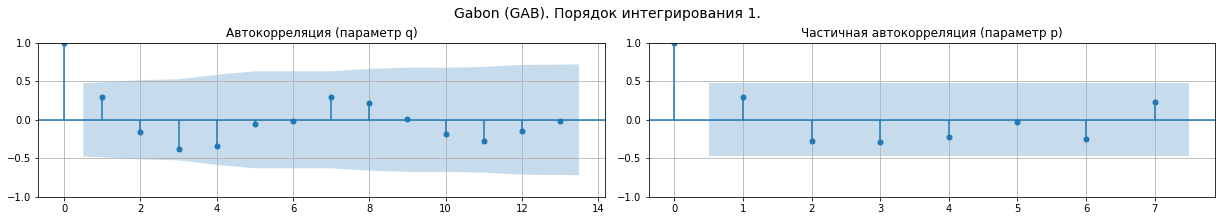

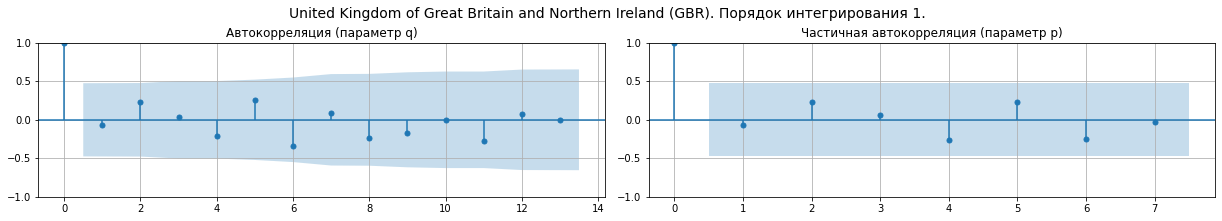

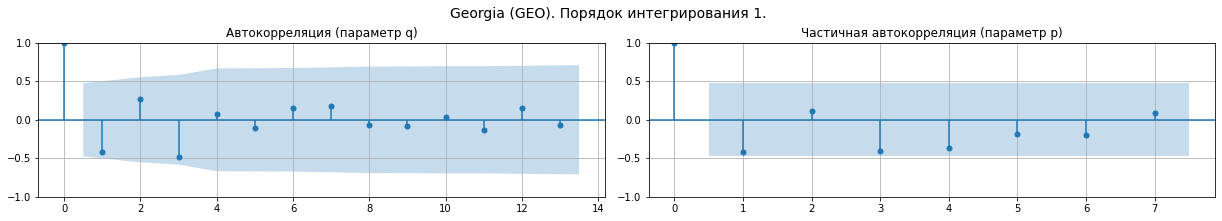

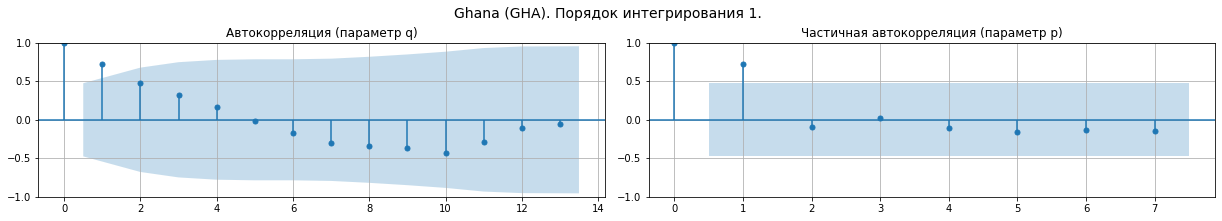

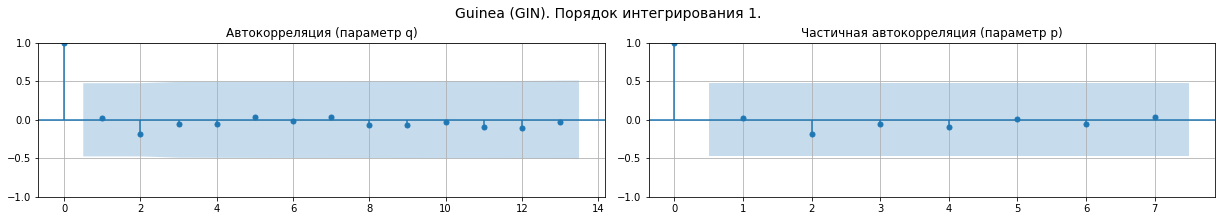

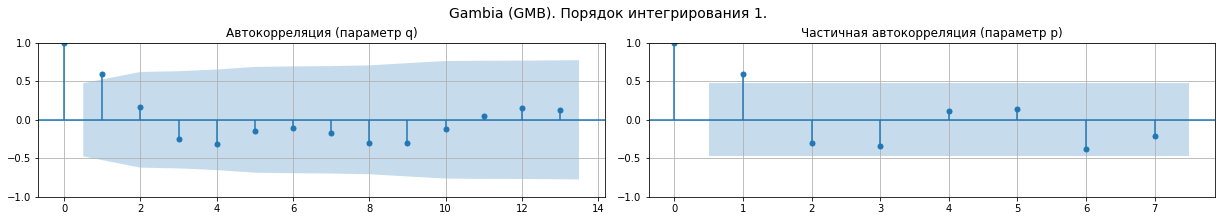

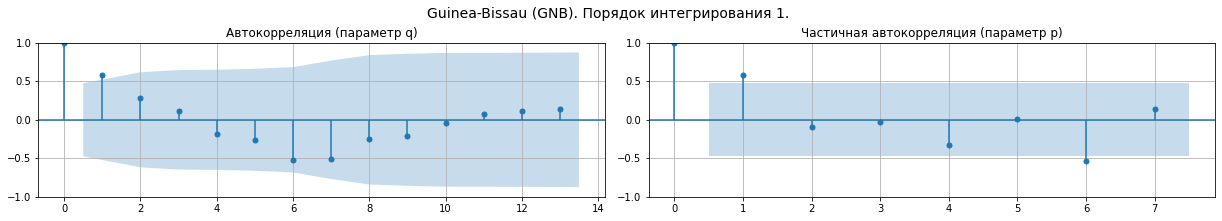

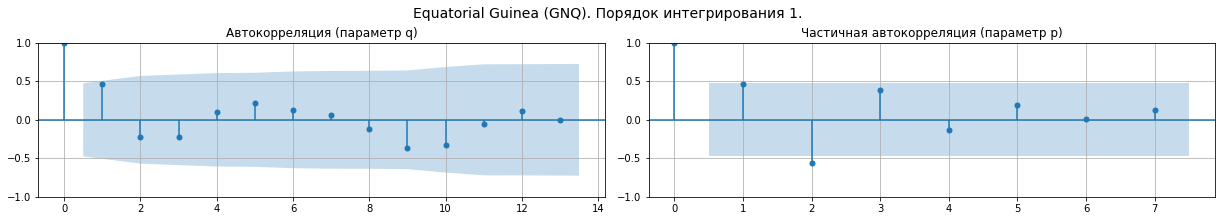

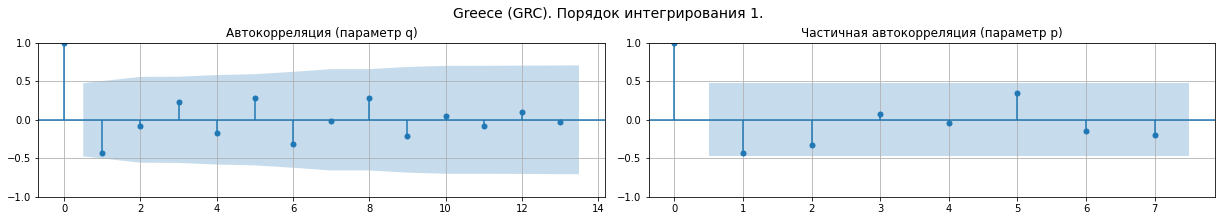

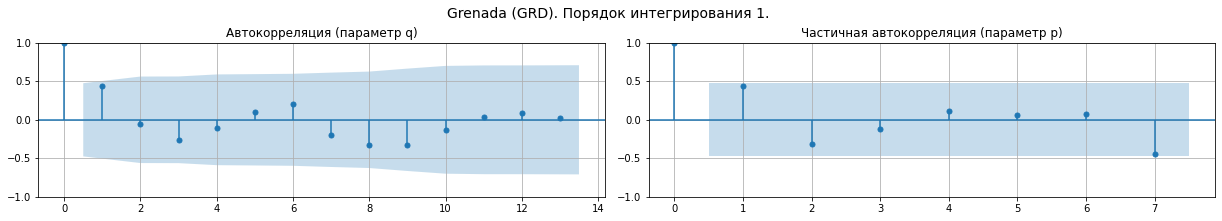

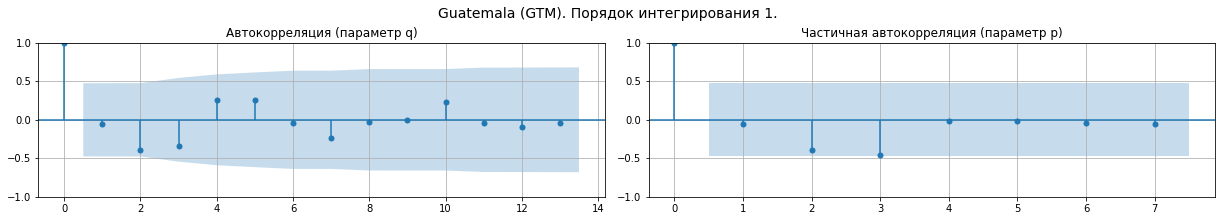

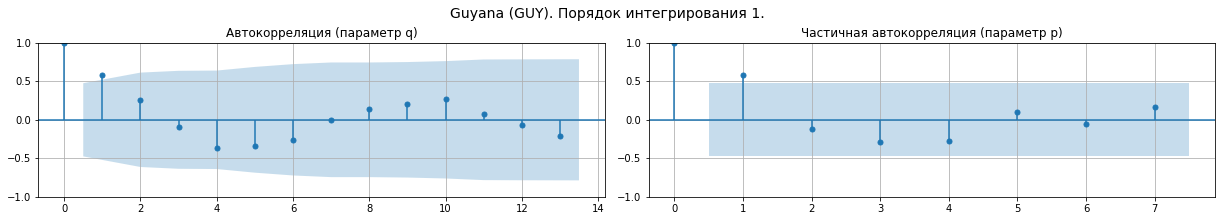

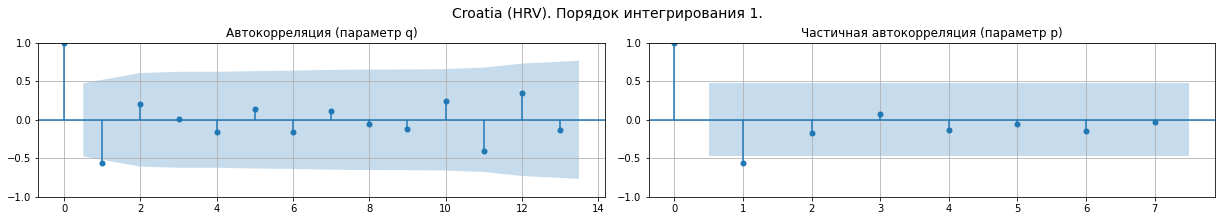

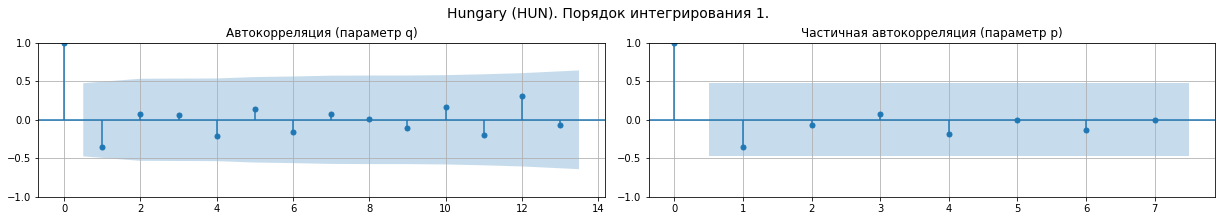

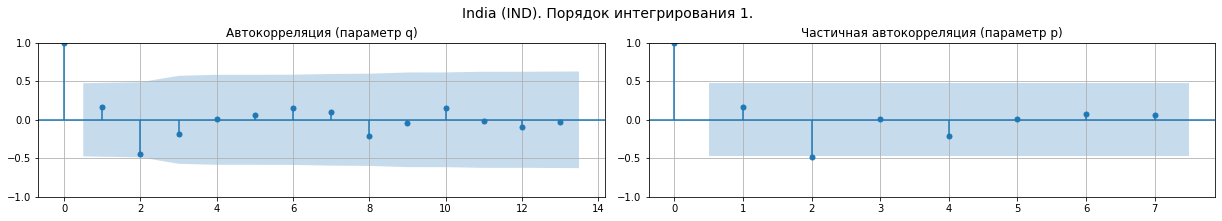

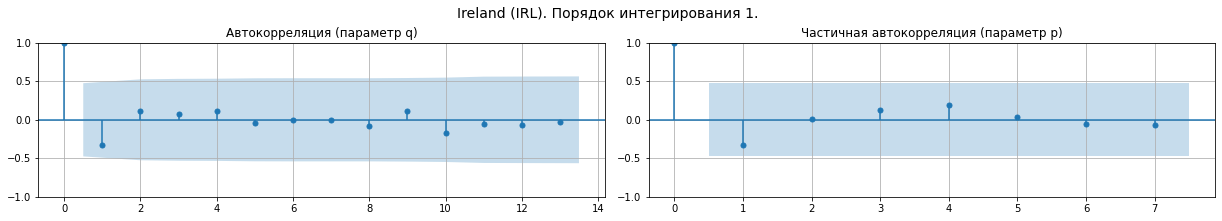

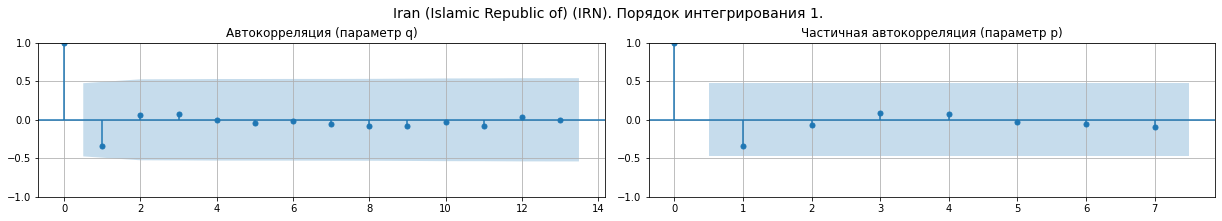

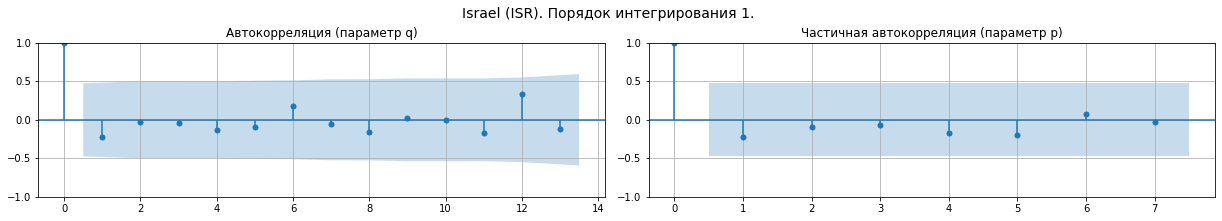

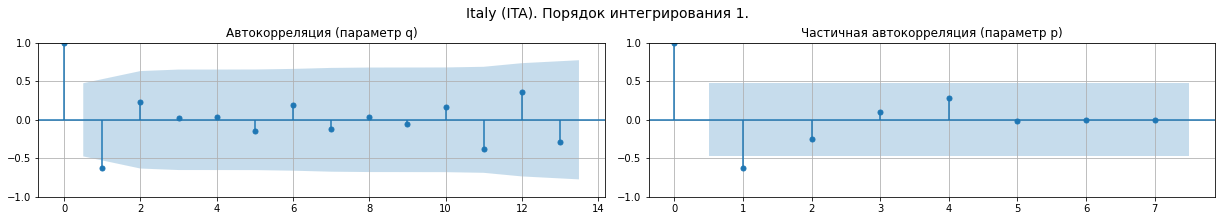

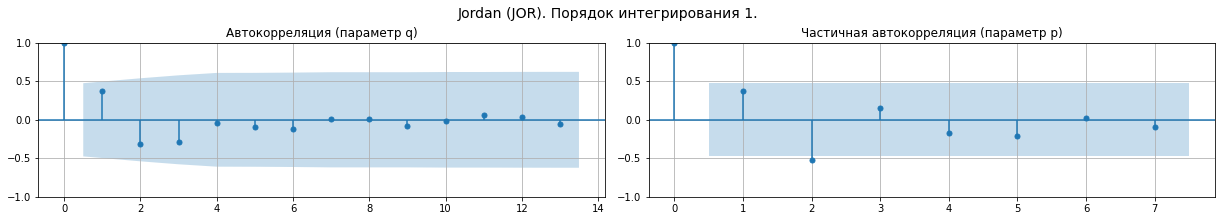

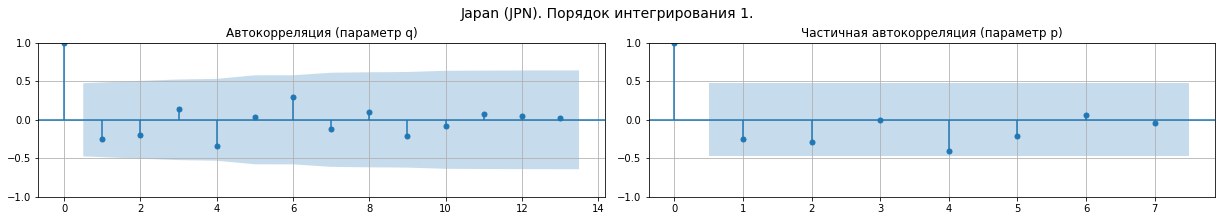

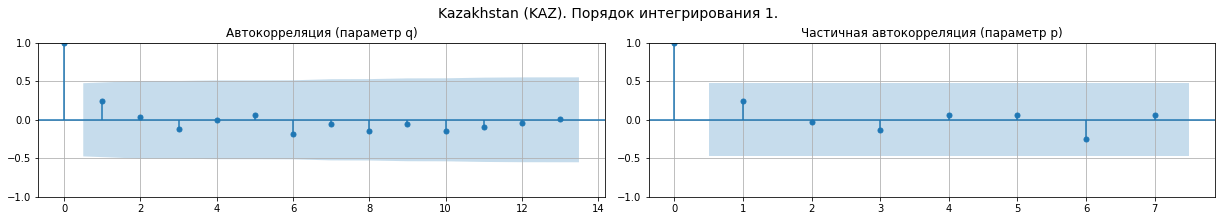

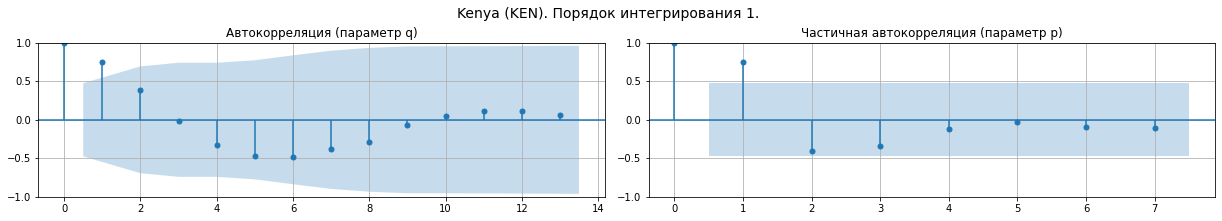

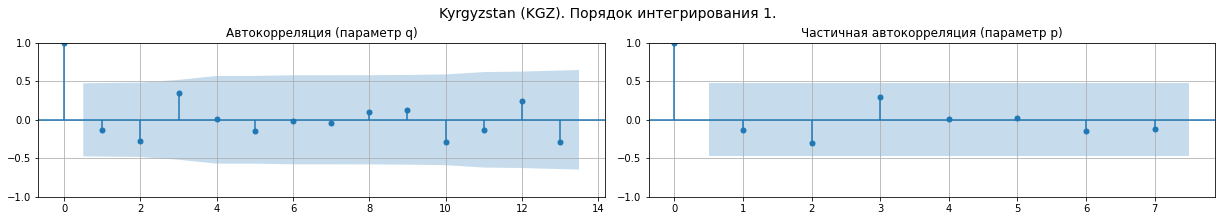

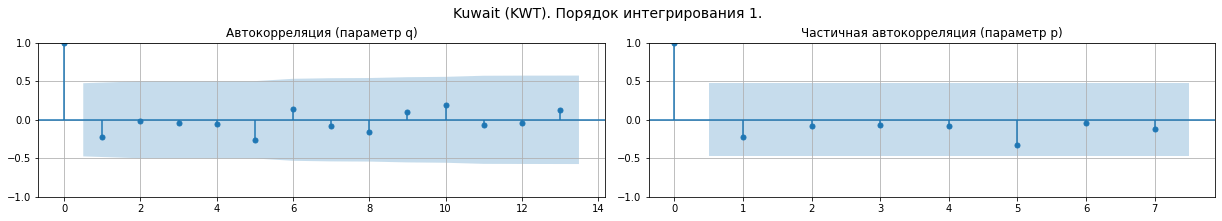

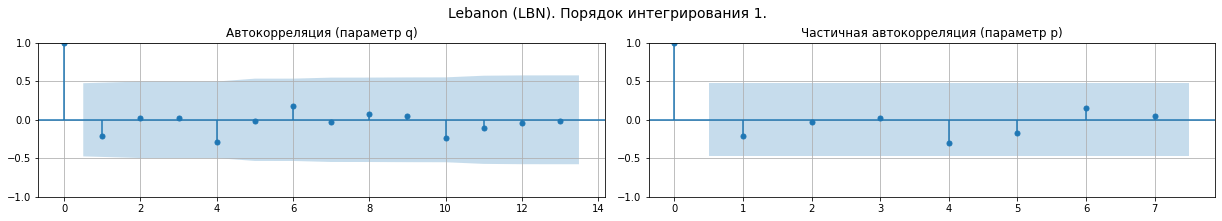

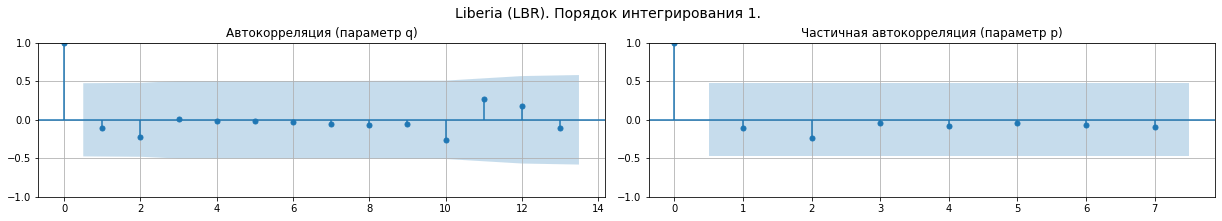

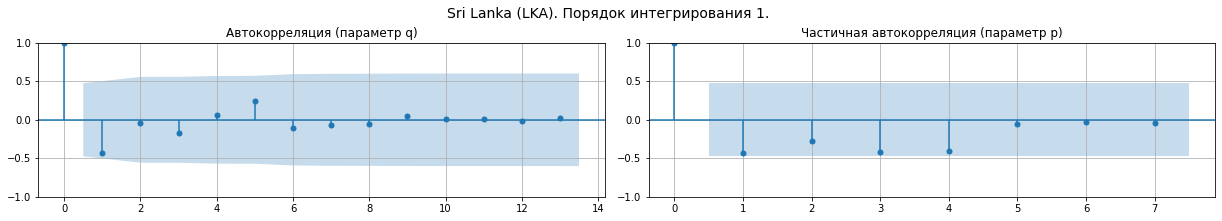

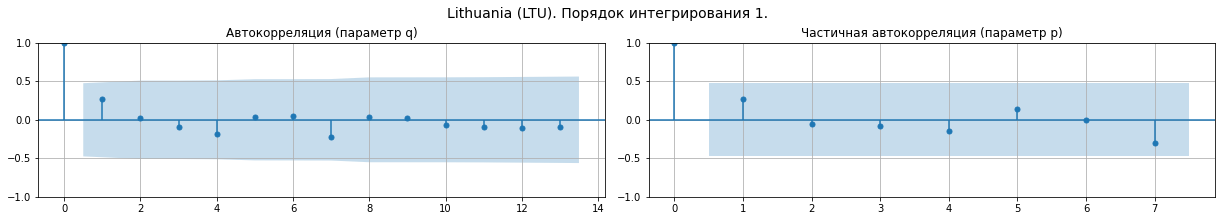

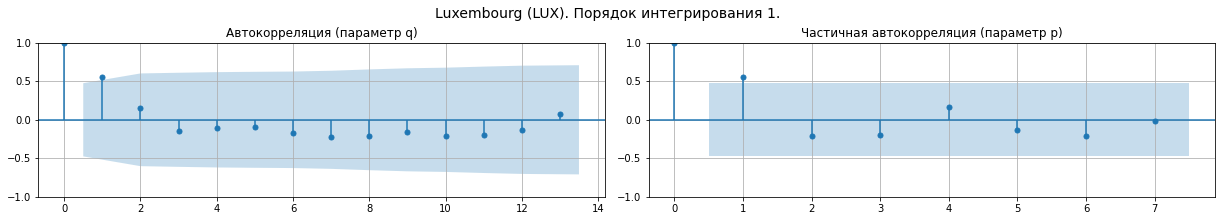

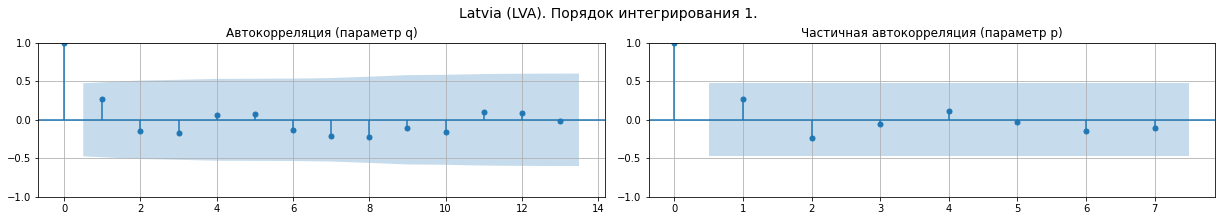

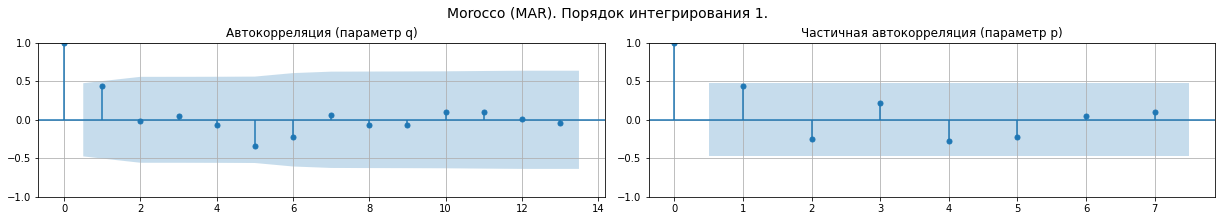

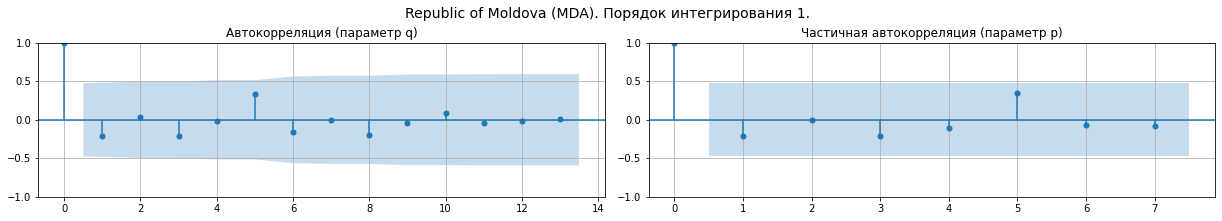

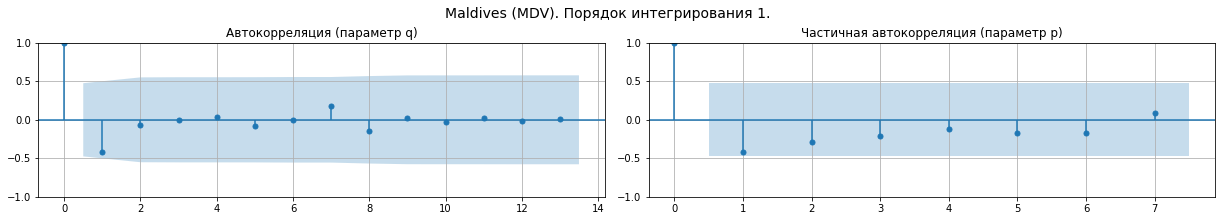

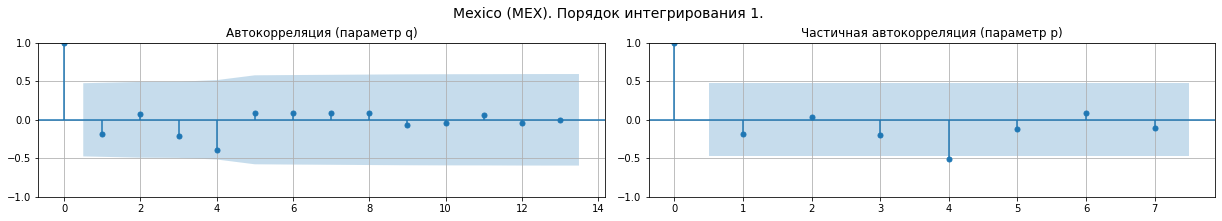

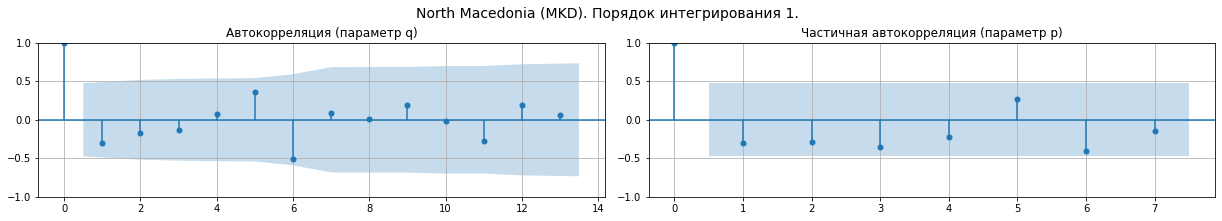

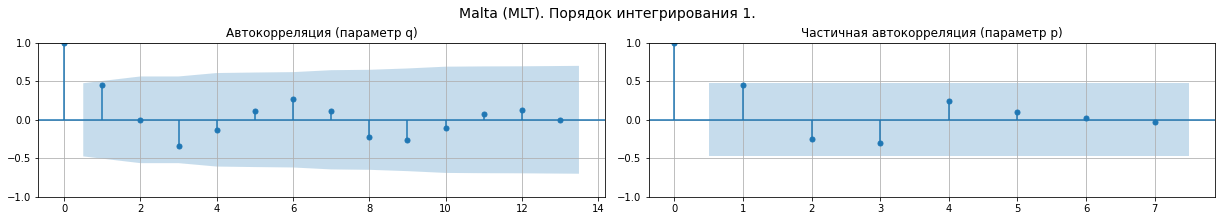

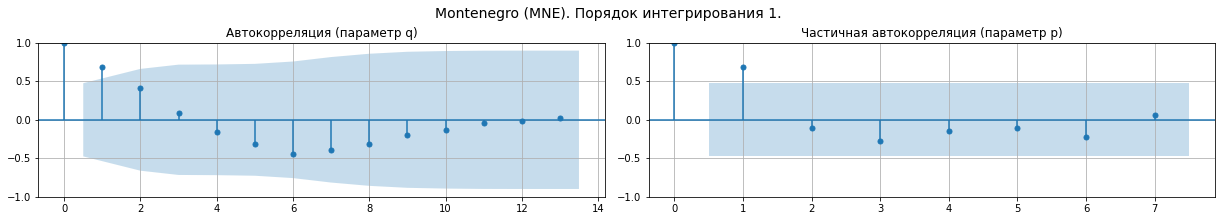

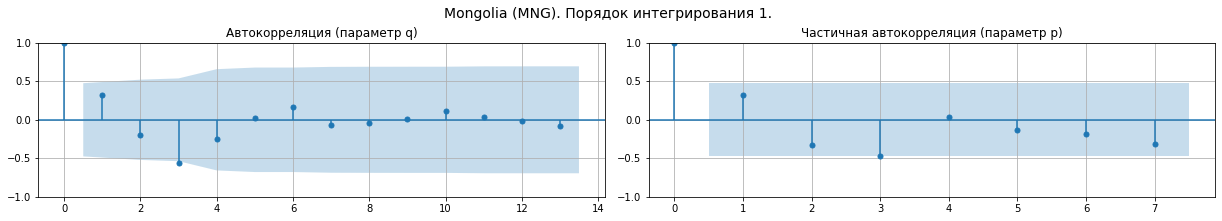

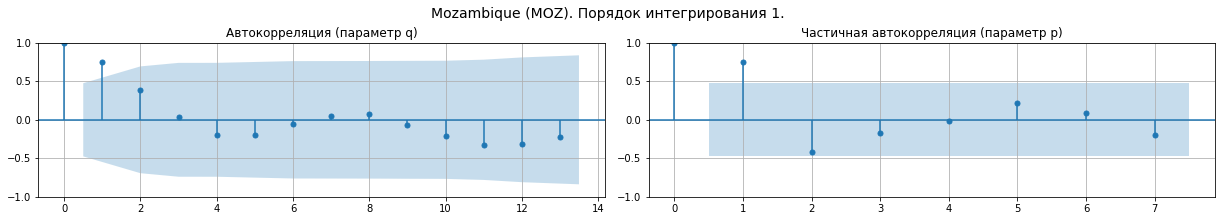

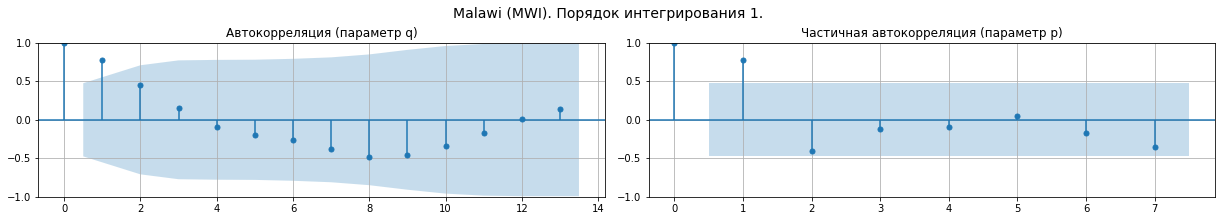

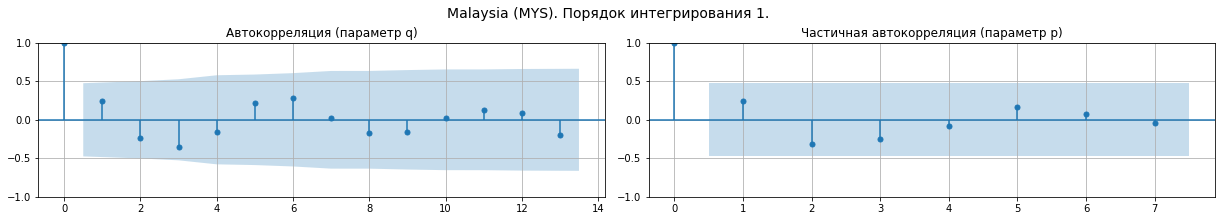

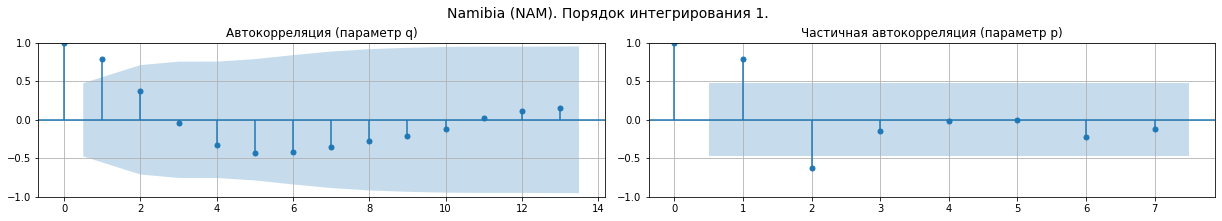

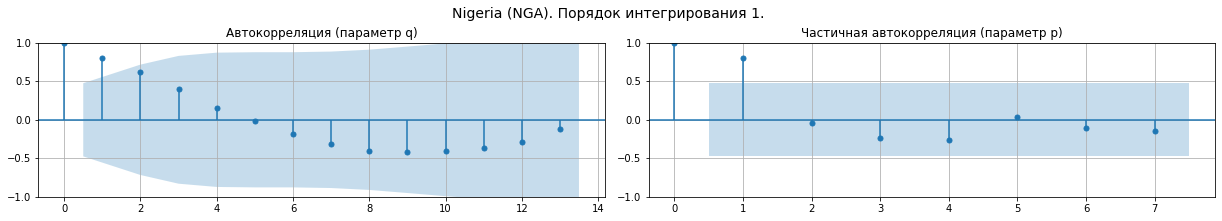

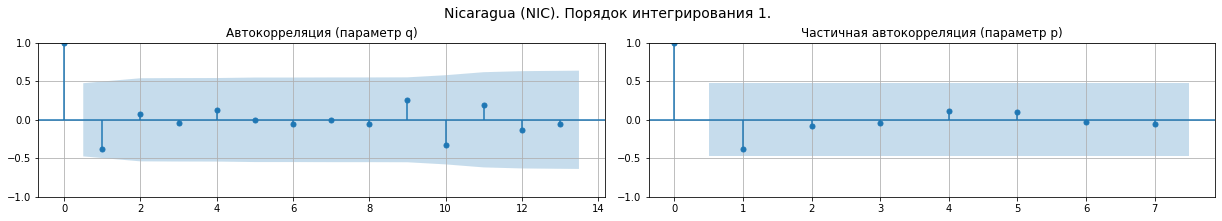

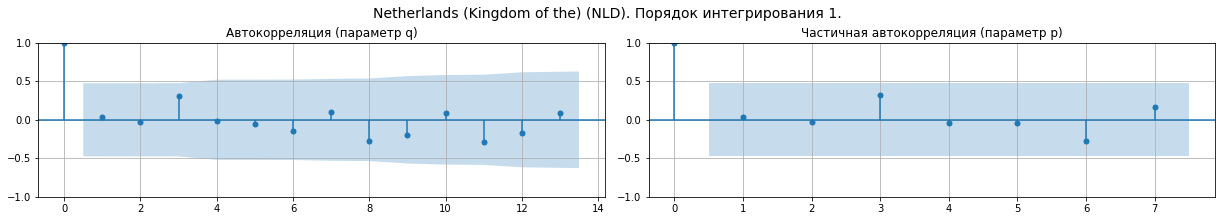

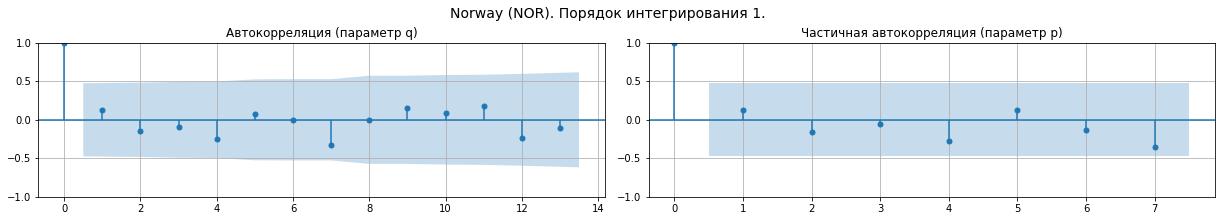

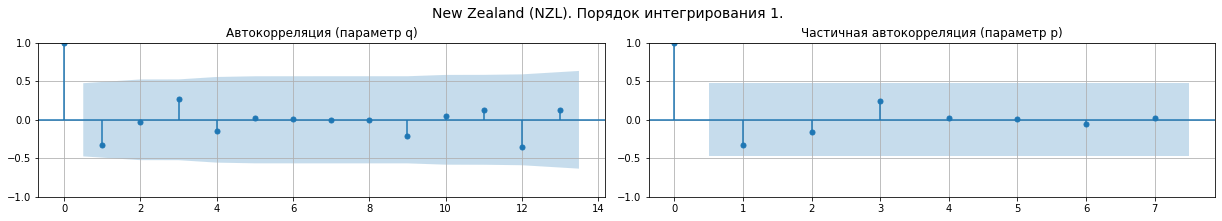

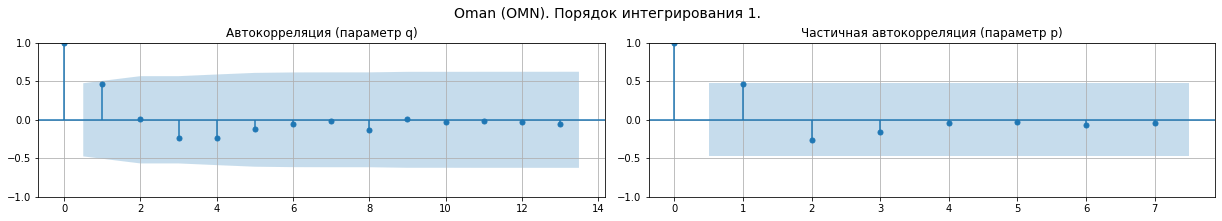

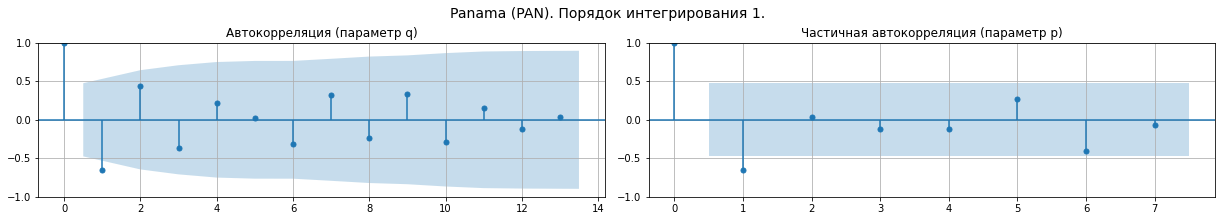

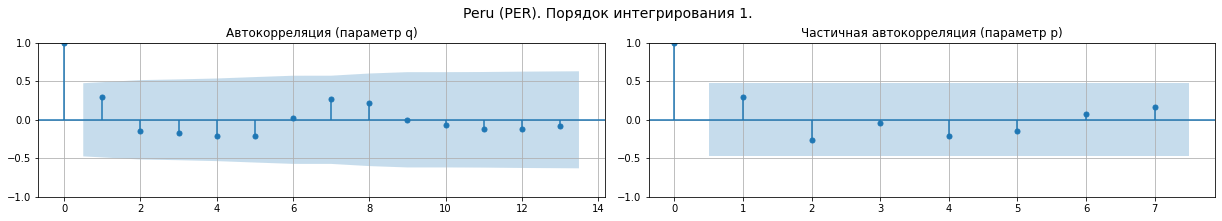

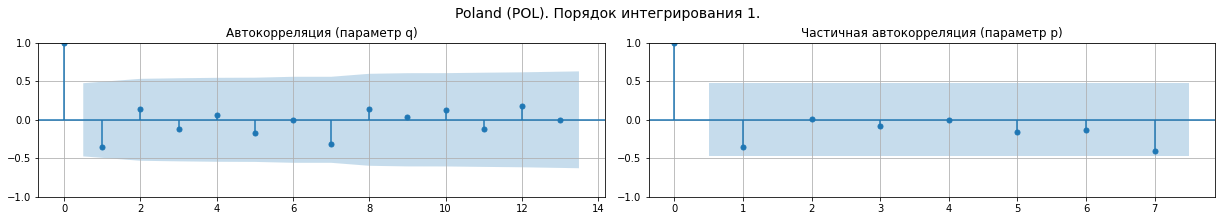

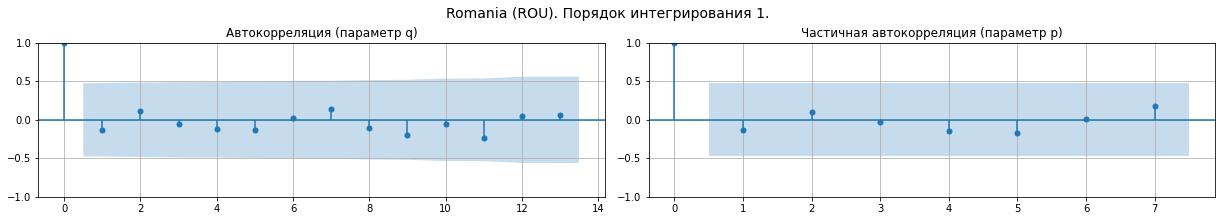

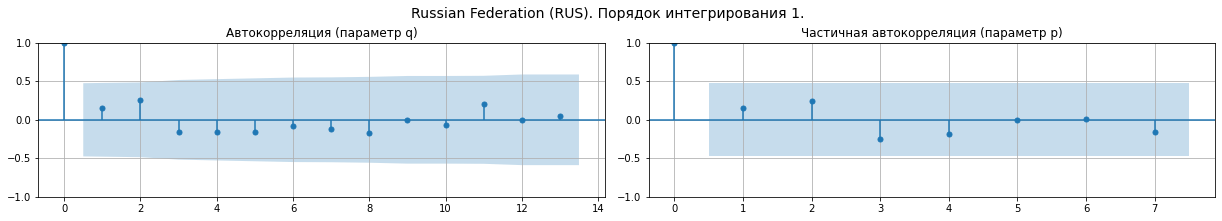

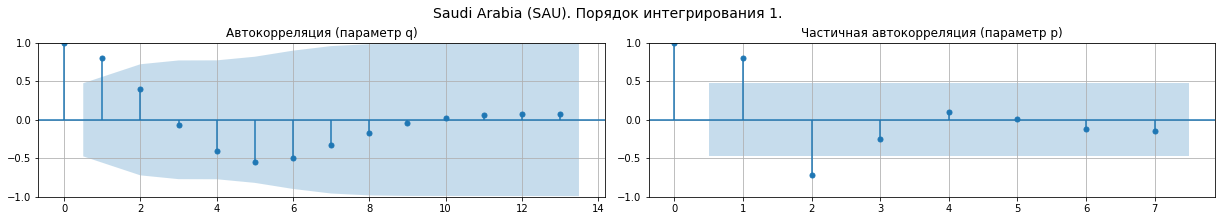

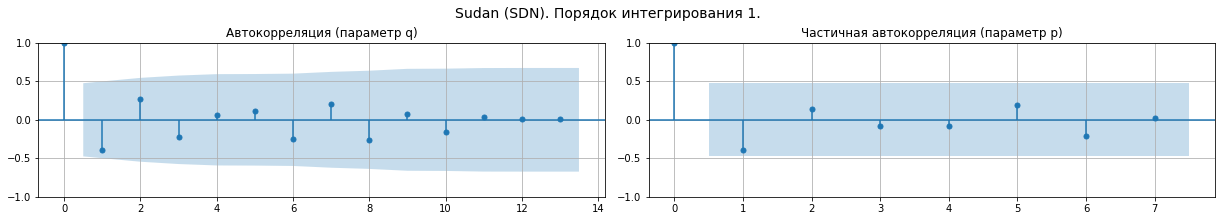

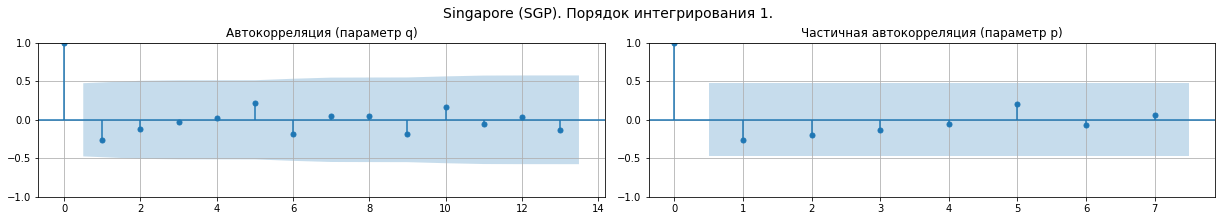

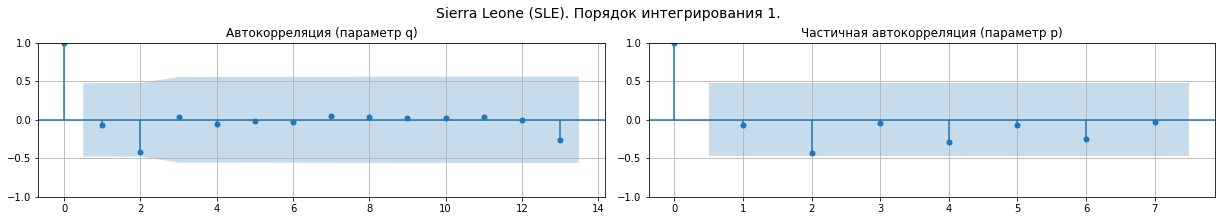

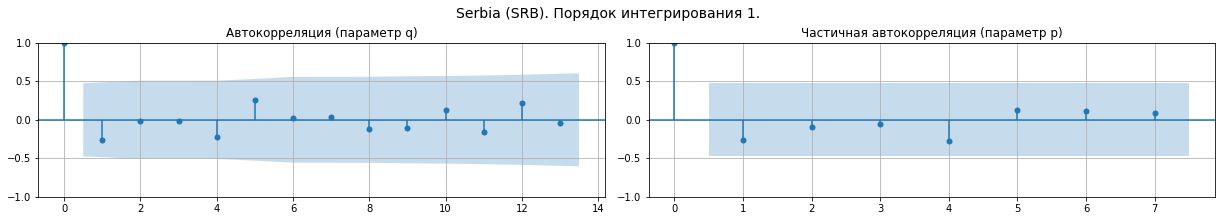

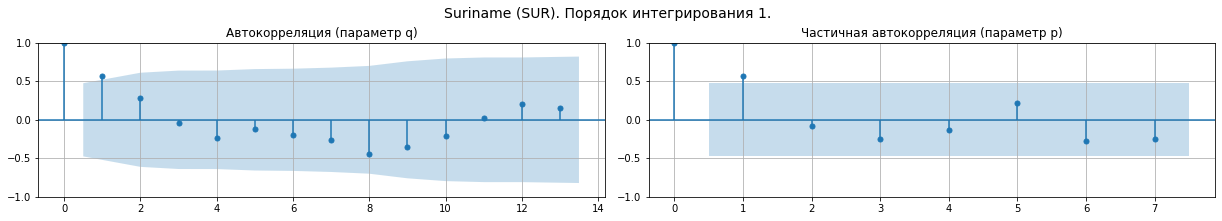

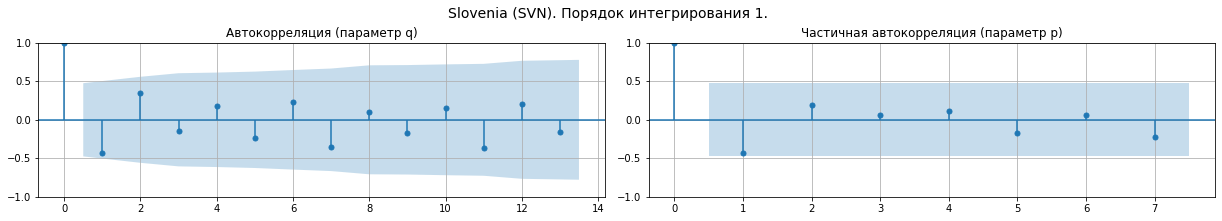

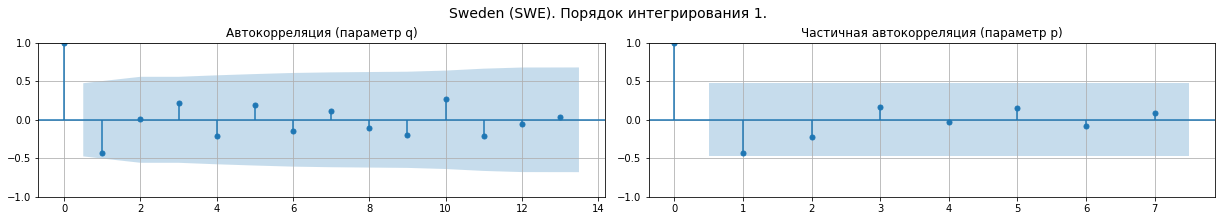

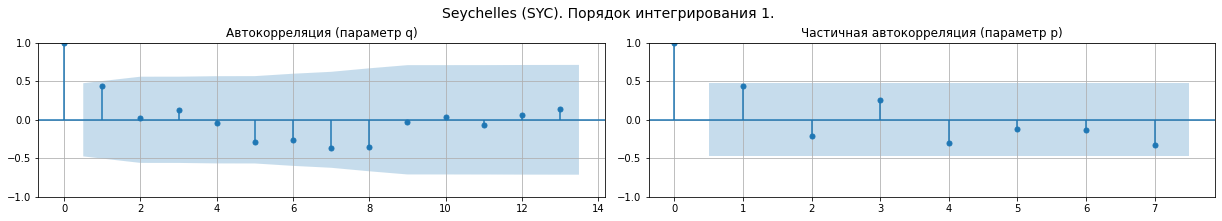

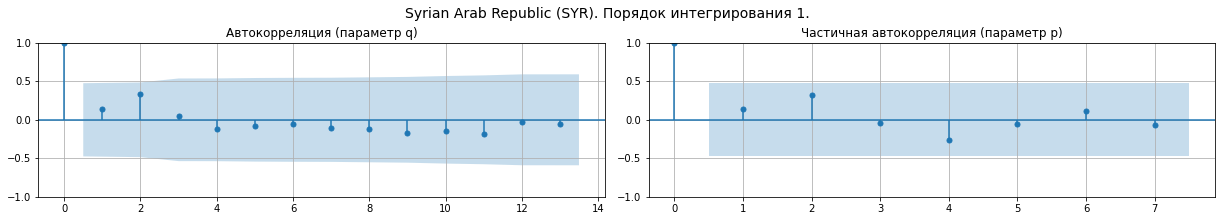

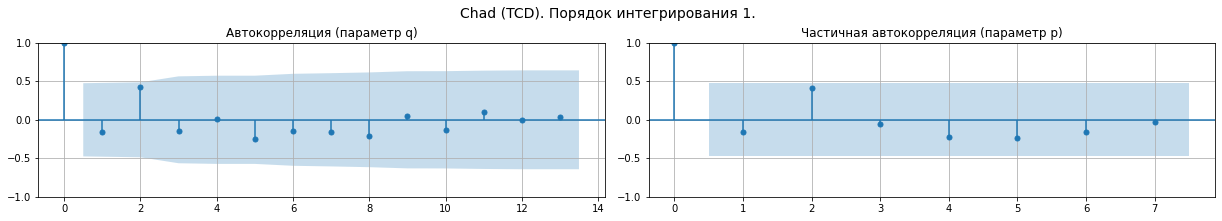

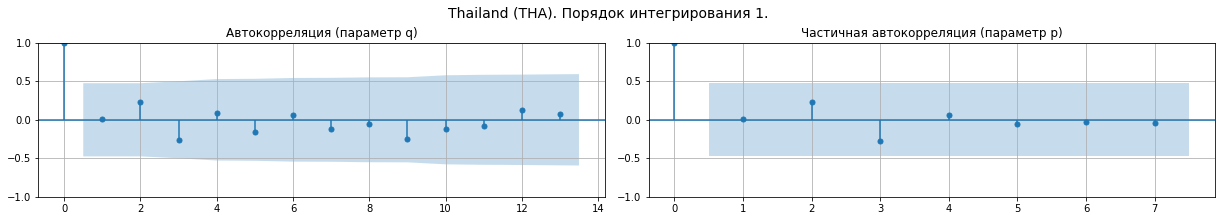

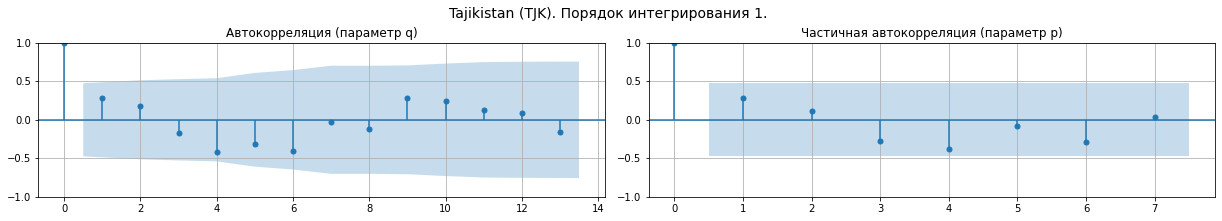

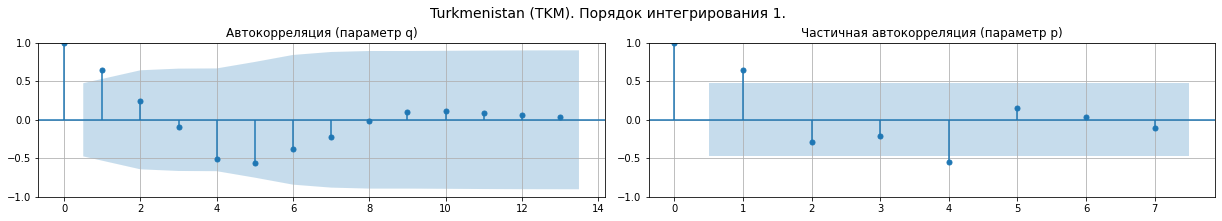

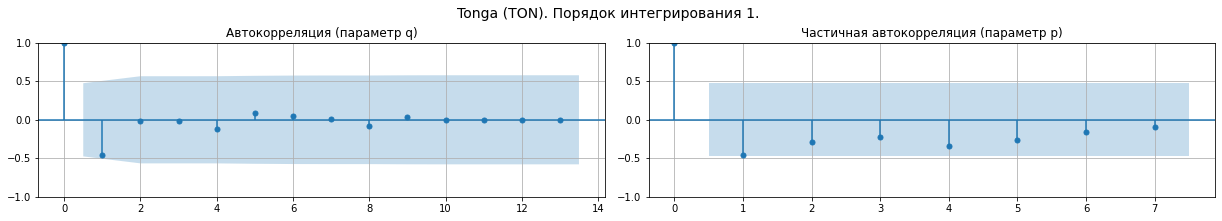

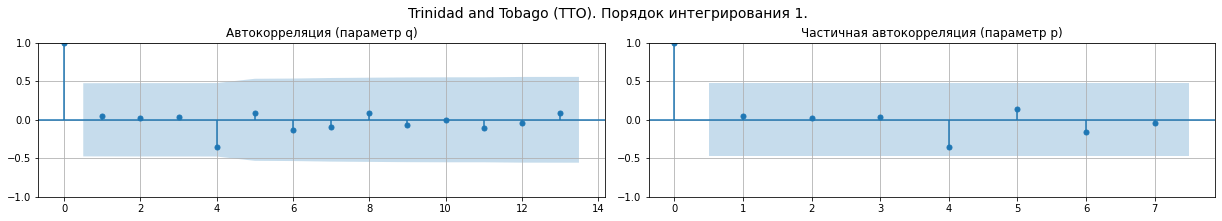

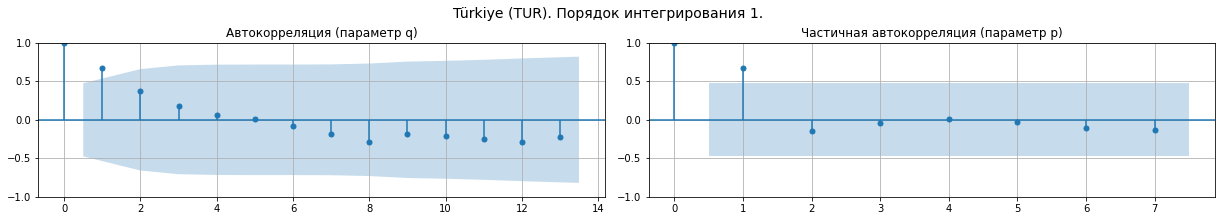

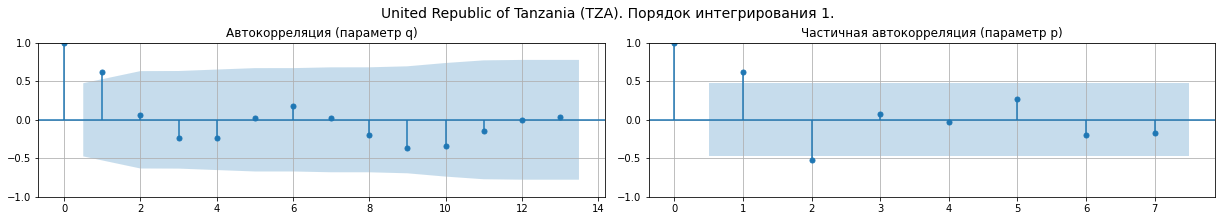

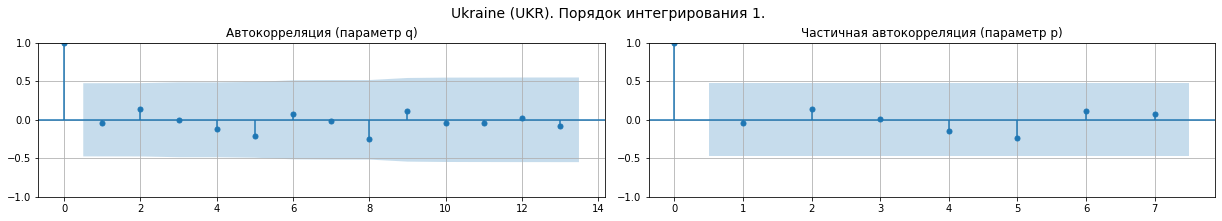

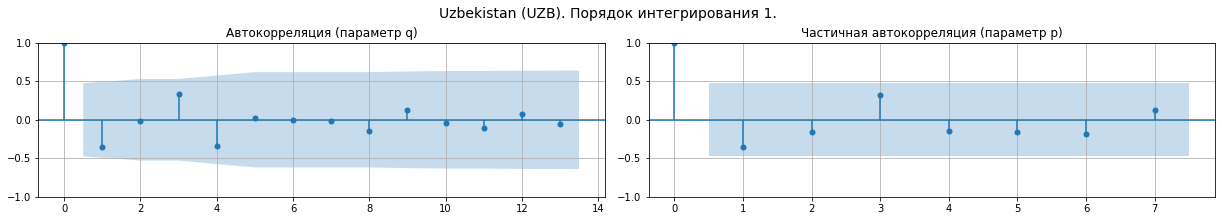

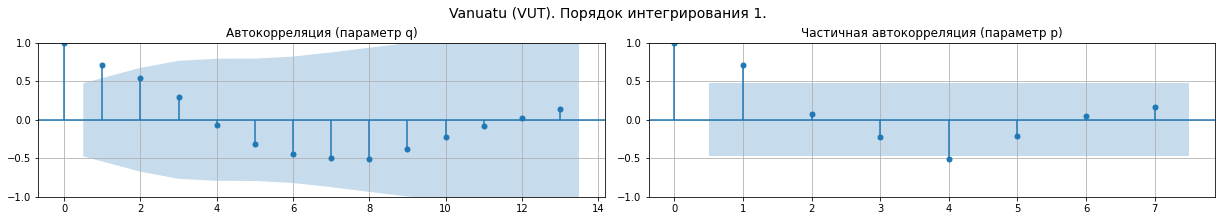

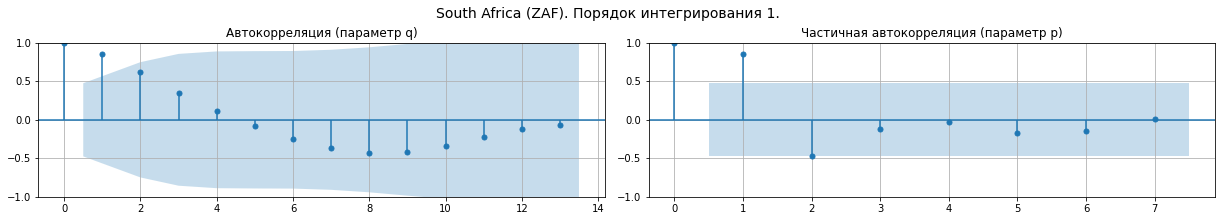

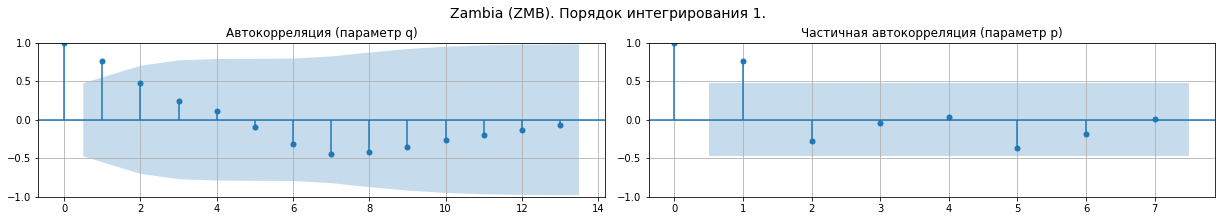

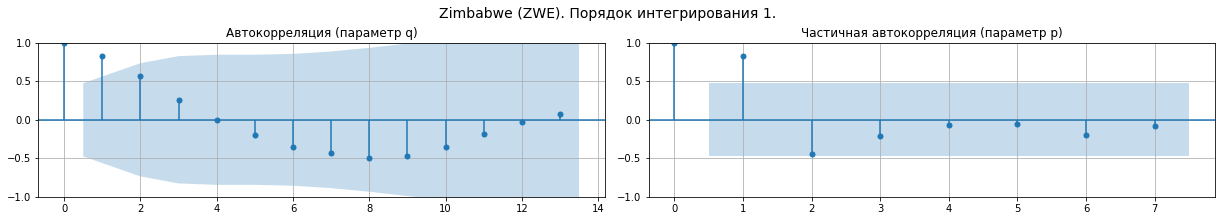

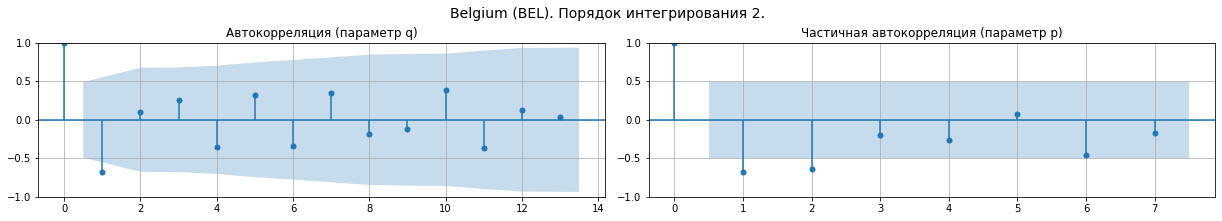

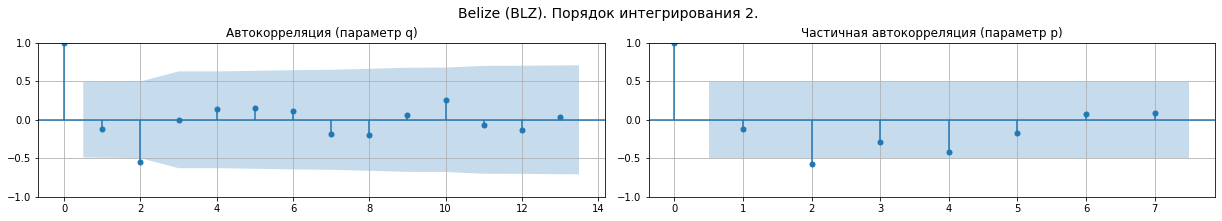

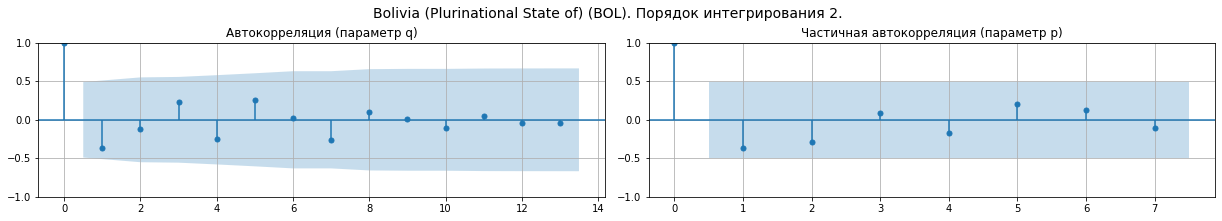

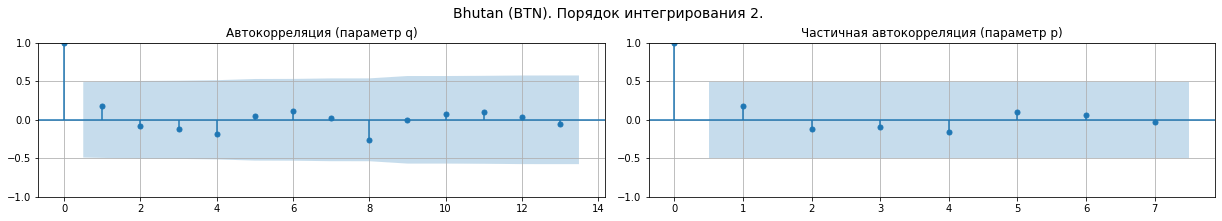

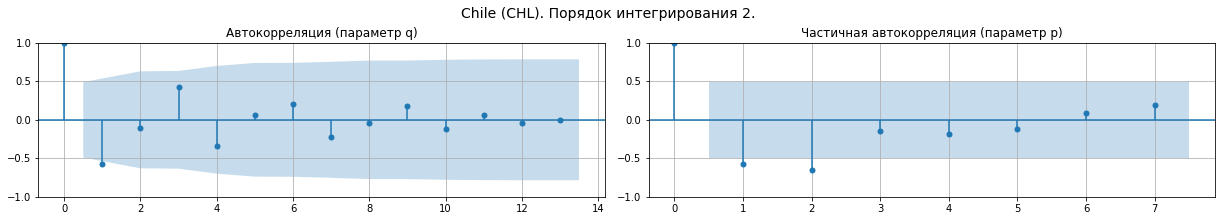

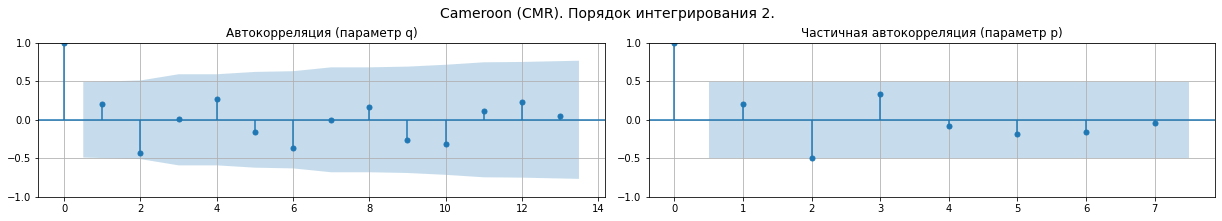

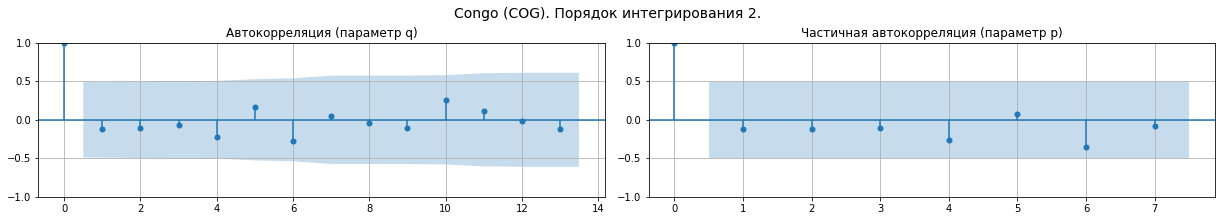

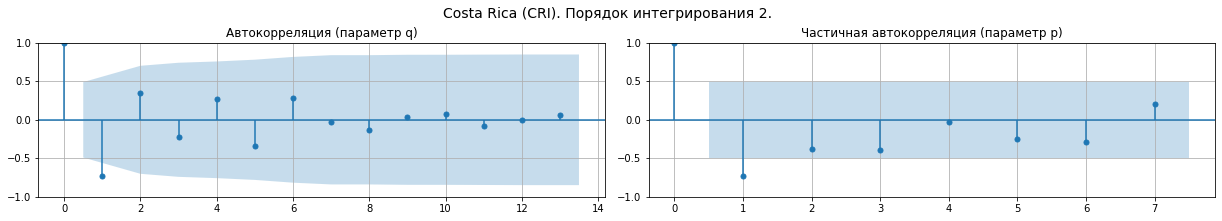

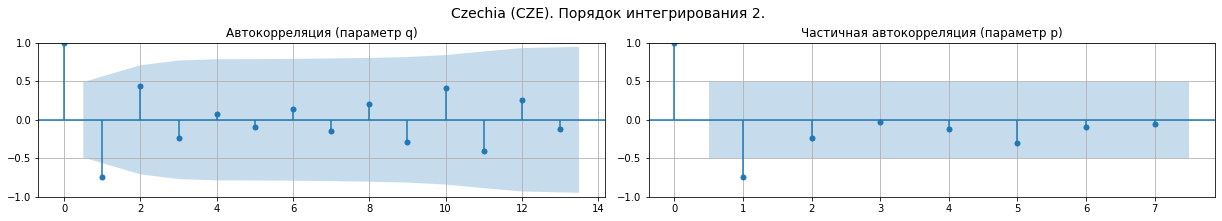

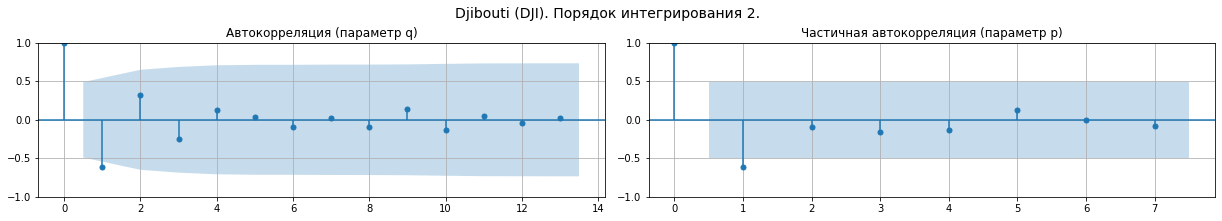

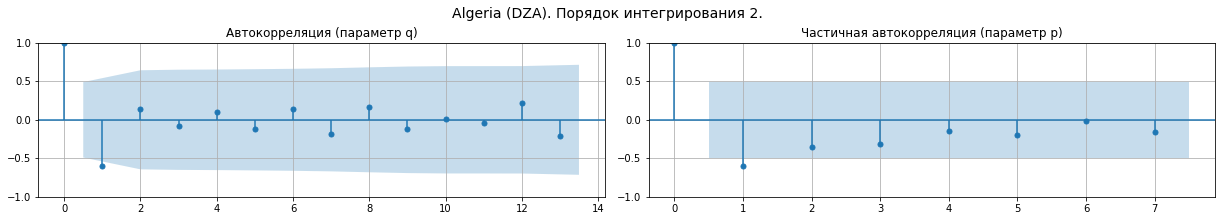

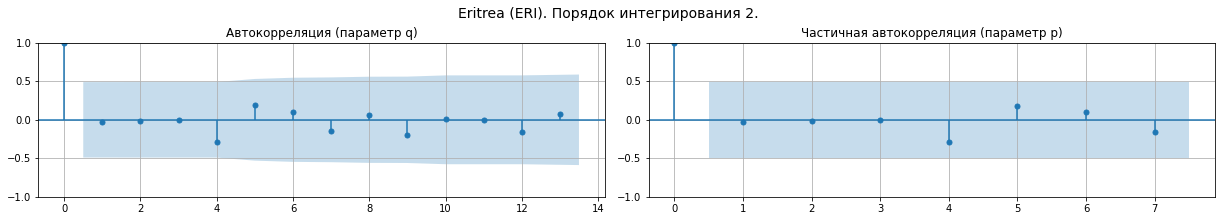

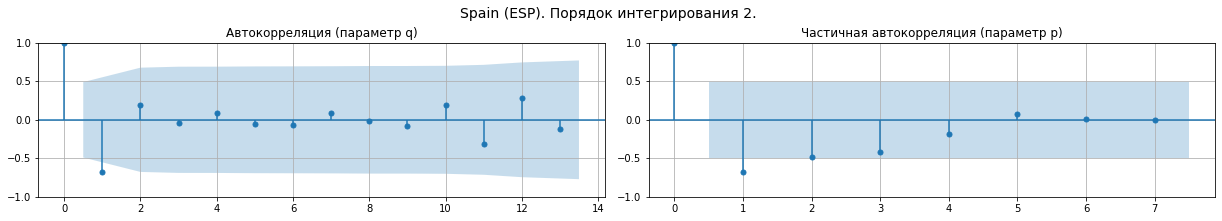

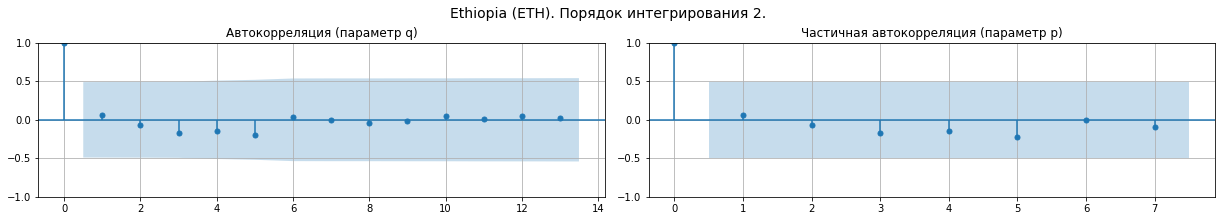

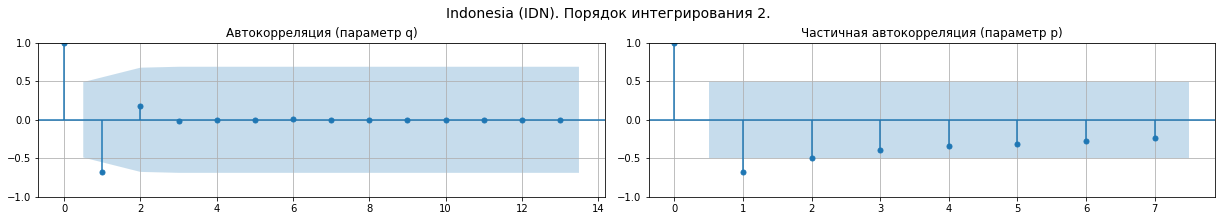

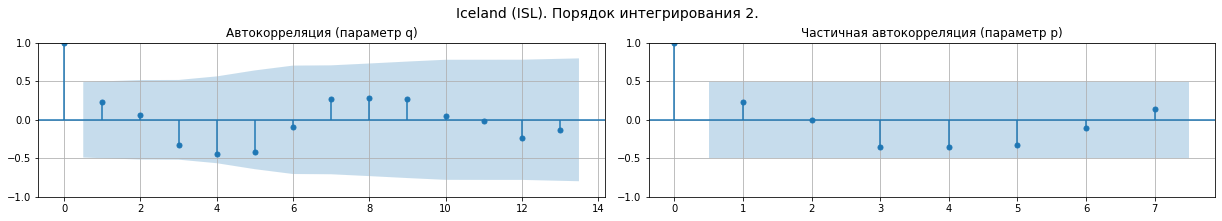

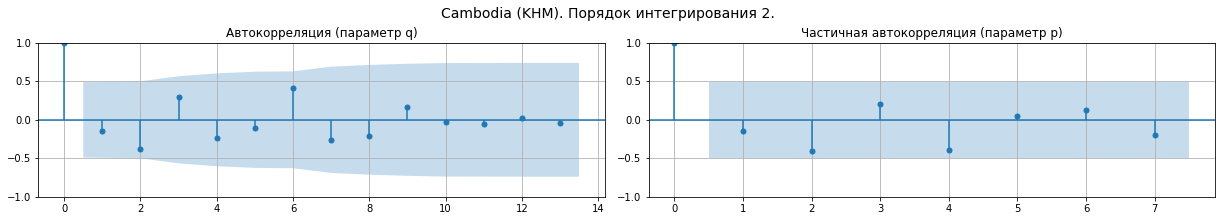

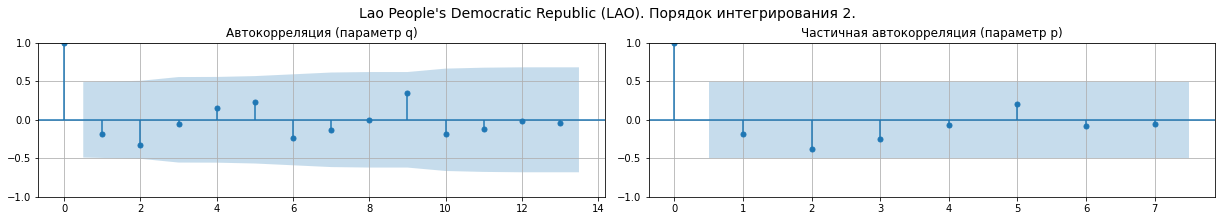

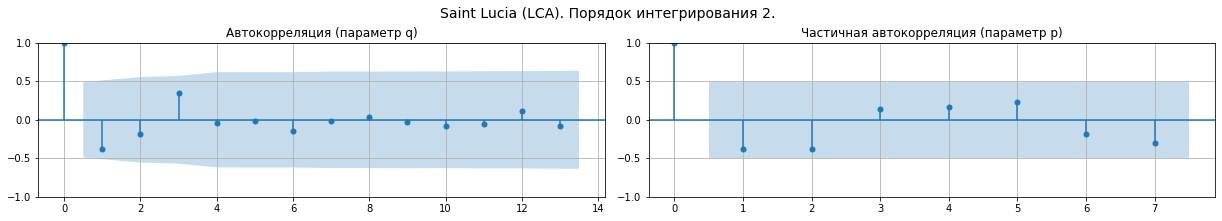

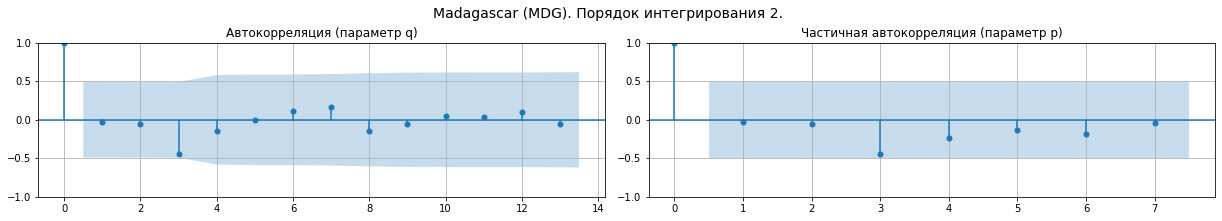

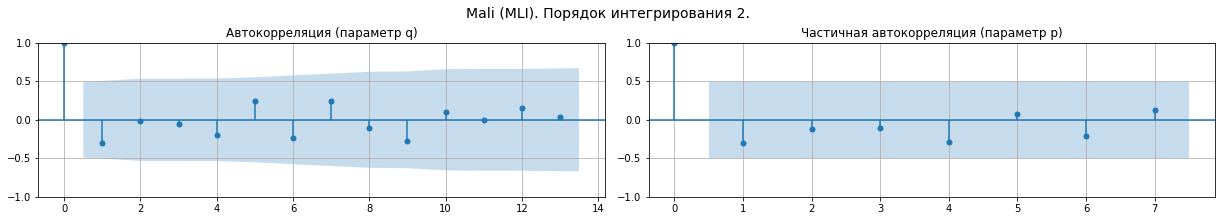

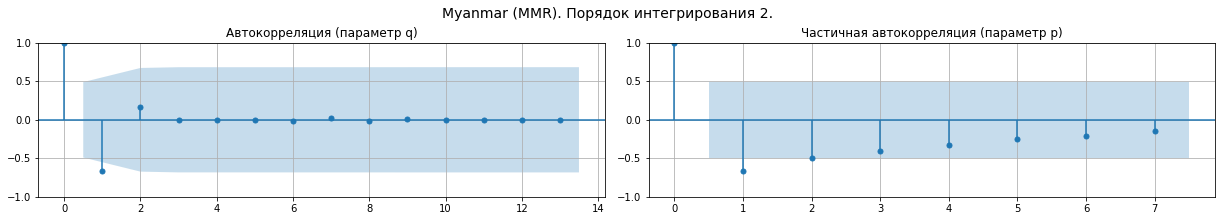

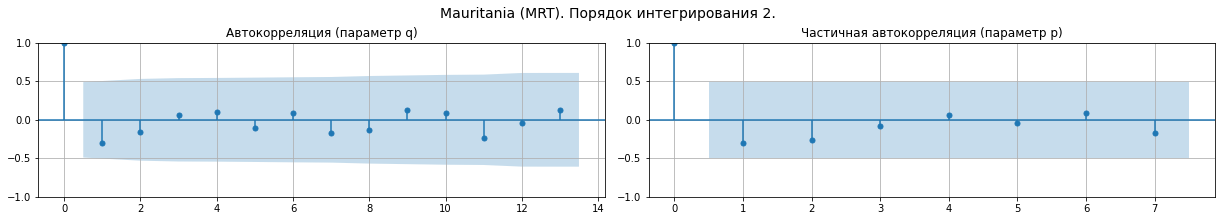

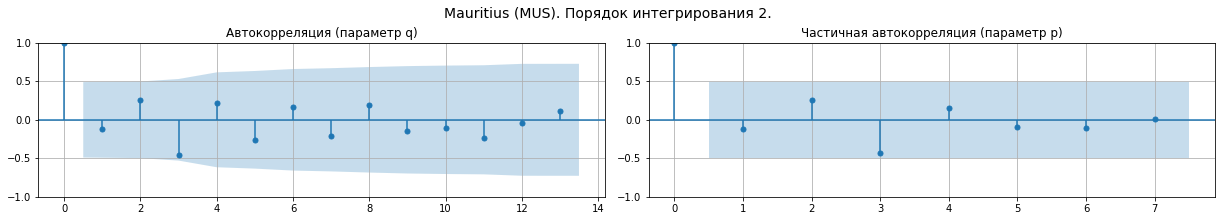

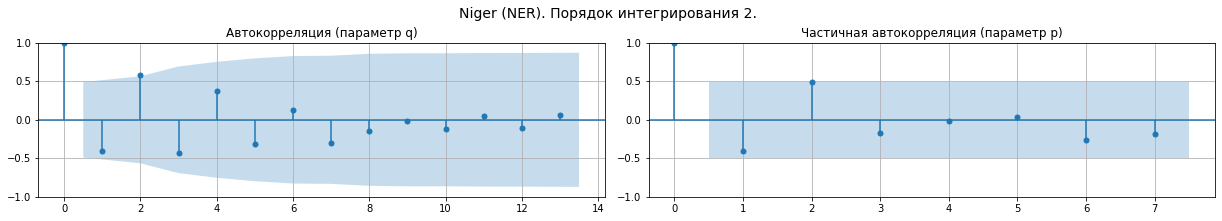

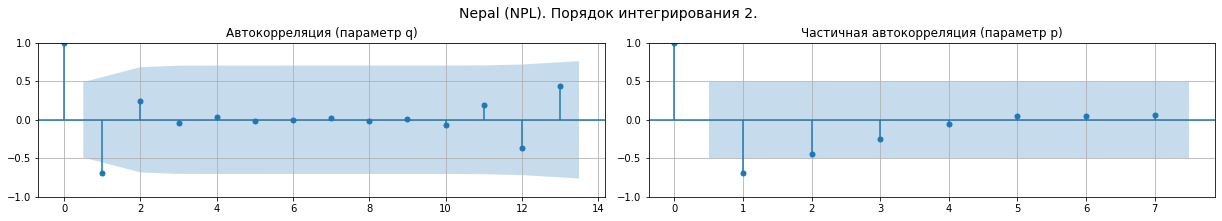

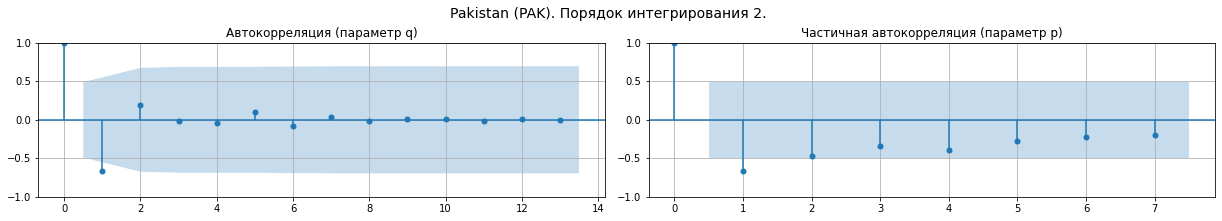

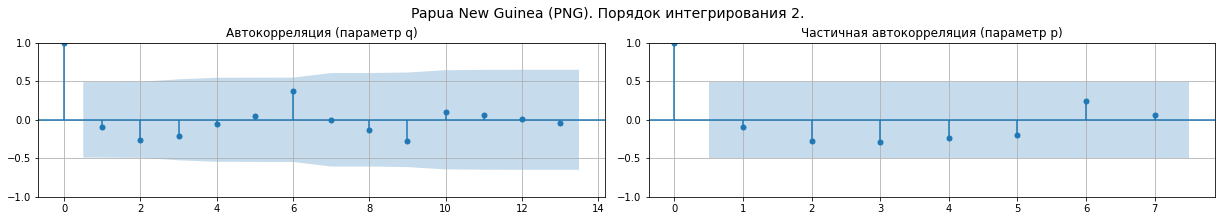

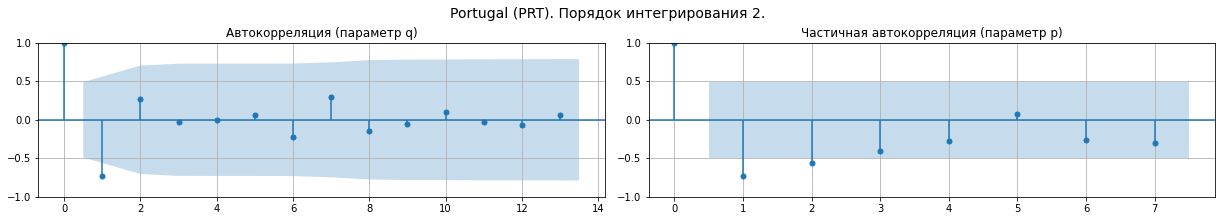

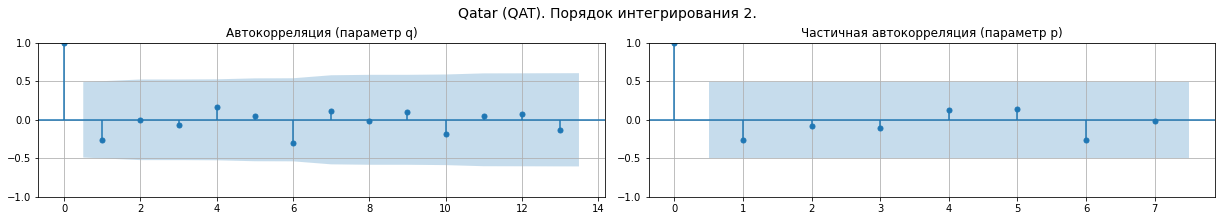

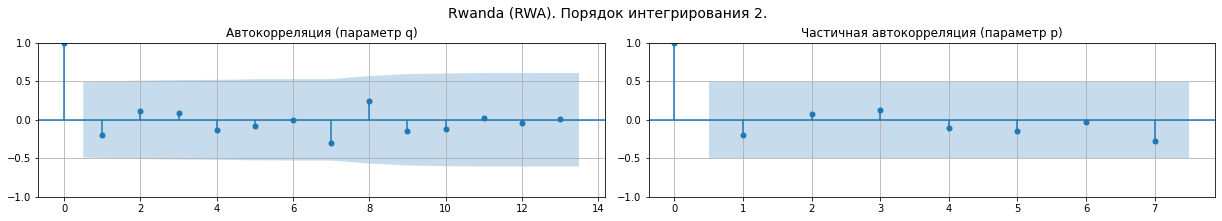

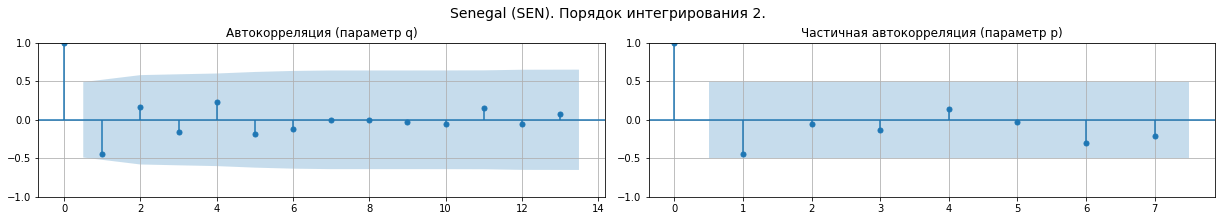

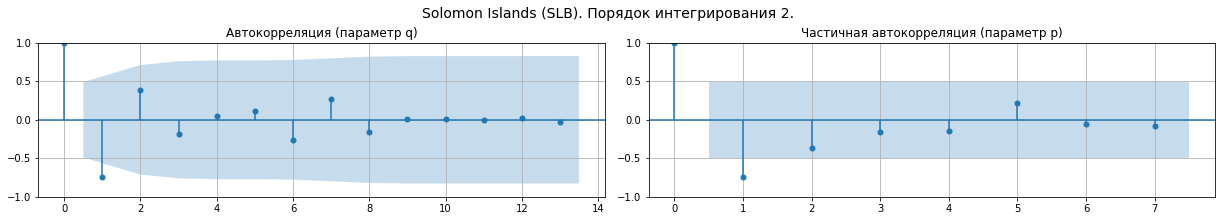

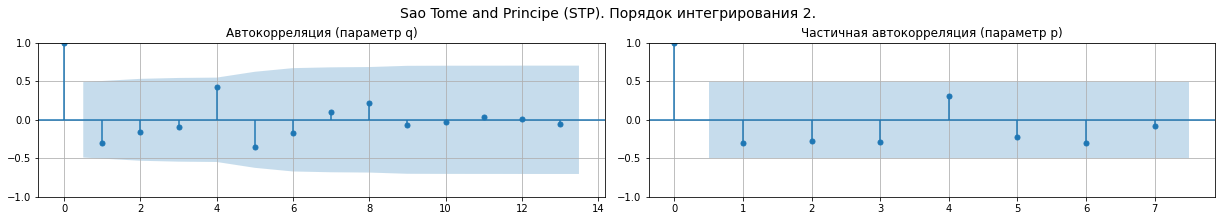

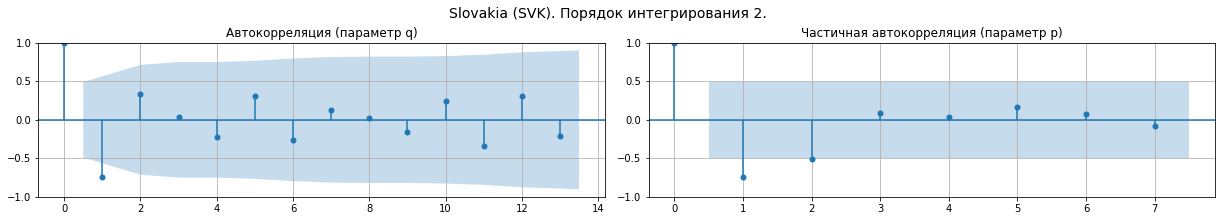

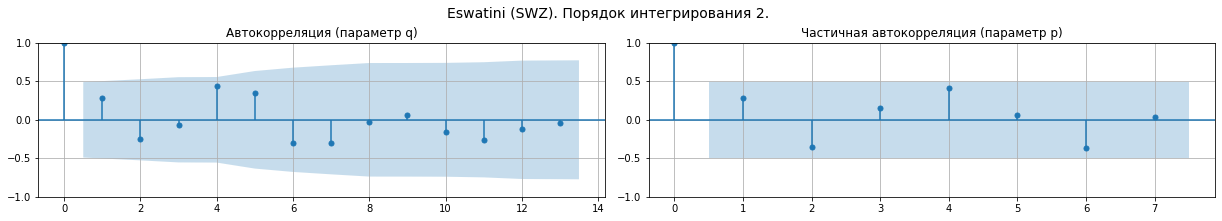

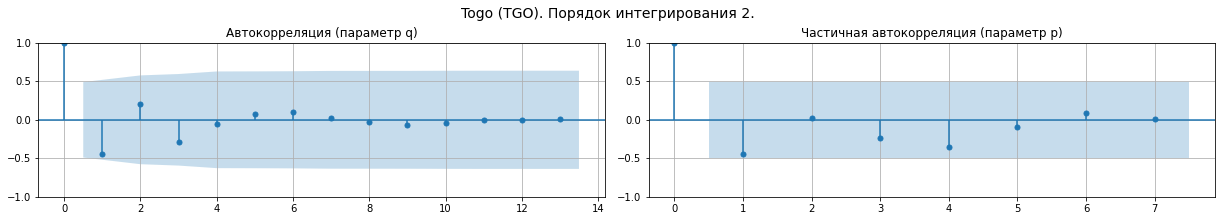

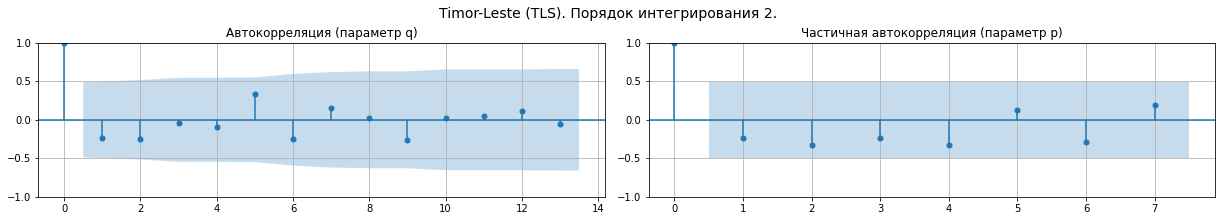

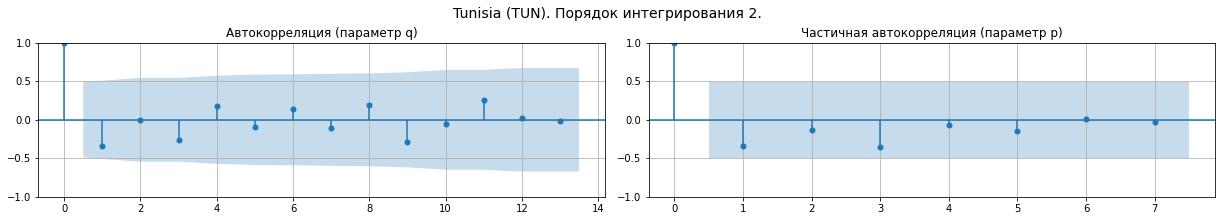

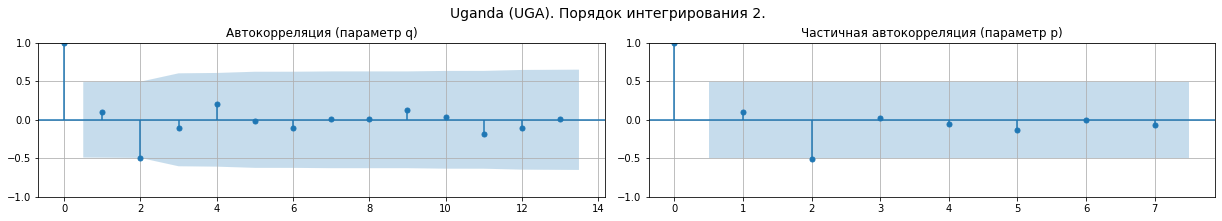

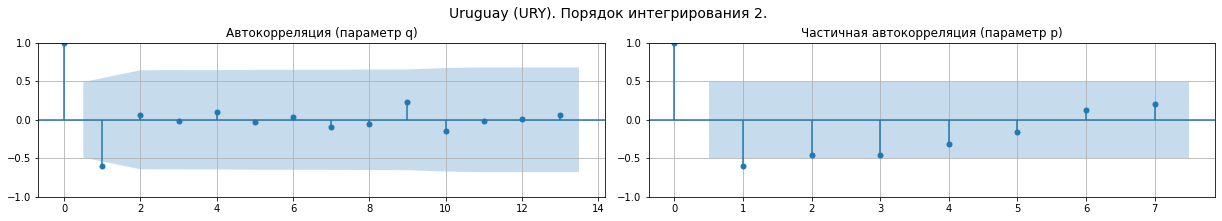

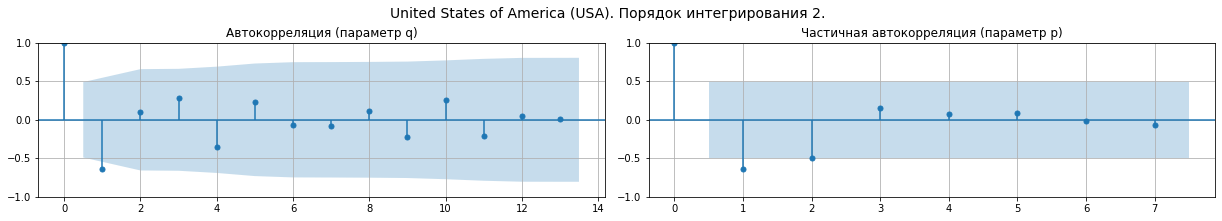

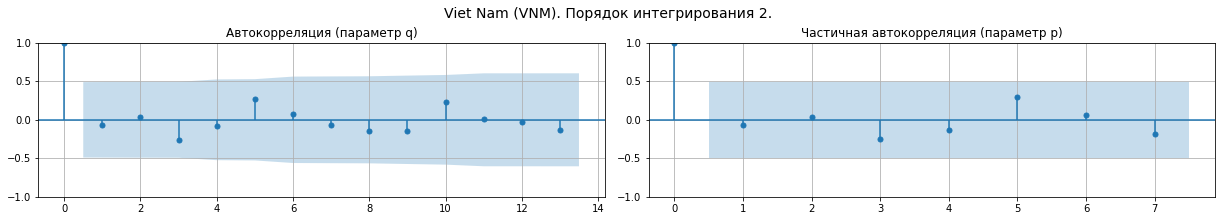

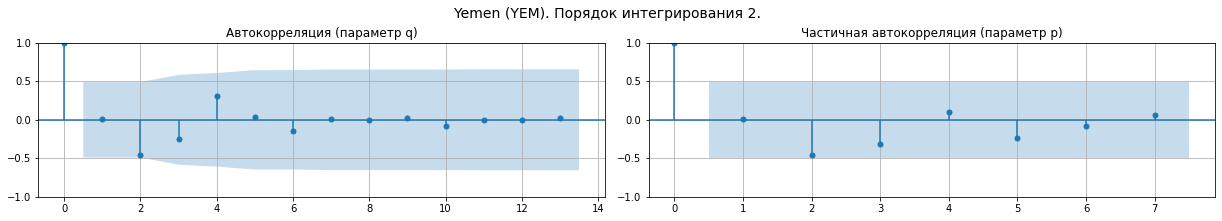

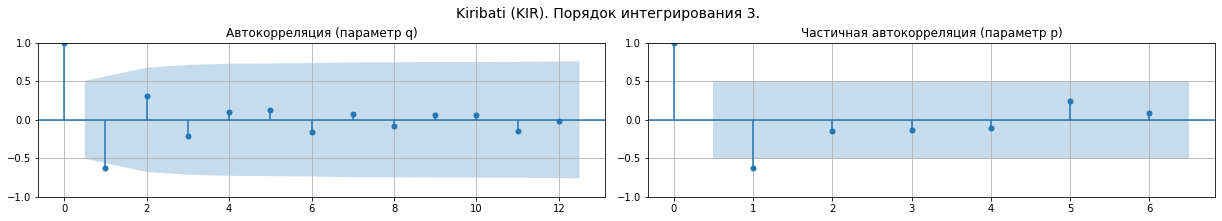

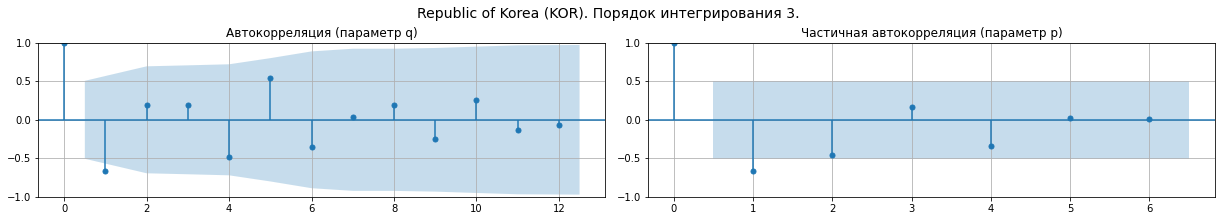

In [ ]:
# Выделим данные тренировочной части, 
# так как корректно исследовать их, а не всю выборку
train_data, test_data = get_train_test_data(data)

# Коды стран отсортируем по возрастанию порядка интегрирования ряда
location_codes = list(
    integration_order_data \
    .sort_values(by=['IntegrationOrder', F.SpatialDimValueCode.value]) \
    [F.SpatialDimValueCode.value].values
)

# Для каждой страны построим графики
for code in location_codes:
    # Название страны
    location = get_location_by_code(code)
    # Порядок интегрирования ряда с ожидаемой продолжительностью жизни для данной страны
    integration_order = get_integration_order(code) 
    # Временной ряд для тренировочных данных
    location_time_series_train = get_location_time_series(train_data, code) 
    # Временной ряд для дифференцирования
    diff_time_series = location_time_series_train
    # При необходимости дифференцируем ряд нужное количество раз (приводим к стационарному)
    if (integration_order > 0):
        for i in range(integration_order):
            diff_time_series = diff_time_series.diff().dropna()
    
    # Выводим графики
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17, 3))
    # Автокорреляция
    plot_acf(
        diff_time_series,
        title='Автокорреляция (параметр q)',
        ax=axs[0],
    )
    axs[0].grid()
    # Частичная автокорреляция
    plot_pacf(
        diff_time_series, 
        lags=math.floor(len(diff_time_series)/2 - 1),
        title='Частичная автокорреляция (параметр p)', 
        ax=axs[1],
    )
    axs[1].grid()
    # Заголовок
    fig.suptitle(f'{location} ({code}). Порядок интегрирования {integration_order}.', fontsize=14)
    fig.tight_layout(pad=0.5)
    plt.show()

У многих рядов нет явно выступающего лага в обоих графиках.\
Но если он есть, то это преимущественно 1-й лаг.